# Введение в искусственные нейронные сети
# Урок 5. Рекуррентные нейронные сети

## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети, либо нейронной сети, работающей airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) или любым любимым временным рядом так, чтобы улучшить её точность. Приложите анализ</li> 
    <li>Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения</li>
    <li>*Попробуйте реализовать нейронную сеть архитектуры LSTM на numpy</li>
    <li>*Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,  MaxAbsScaler
from sklearn.metrics import mean_squared_error
from google.colab import files

# airplane.py

In [62]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

def get_results(dataframe=pd.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python'),
                scaler=MinMaxScaler(feature_range=(0, 1)),
                look_back=3,
                batch_size=1,
                epochs=1,
                res_dict={'models':[],
                          'trainPredicts':[],
                          'testPredicts':[],
                          'look_backs': [],
                          'batch_sizes': [],
                          'epochs': [],
                          'train_score_RMSE': [],
                          'test_score_RMSE':[]}):

  numpy.random.seed(7)

  dataframe = dataframe
  dataset = dataframe.values
  dataset = dataset.astype('float32')
  scaler = scaler
  dataset = scaler.fit_transform(dataset)

  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  # reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
  testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

  batch_size = batch_size
  epochs = epochs
  model = Sequential()
  model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  for i in range(100):
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

  trainPredict = model.predict(trainX, batch_size=batch_size)
  model.reset_states()
  testPredict = model.predict(testX, batch_size=batch_size)

  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  res_dict['models'].append(model)
  res_dict['trainPredicts'].append(trainPredict)
  res_dict['testPredicts'].append(testPredict)

  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))

  res_dict['epochs'].append(epochs)
  res_dict['batch_sizes'].append(batch_size)
  res_dict['look_backs'].append(look_back)
  res_dict['train_score_RMSE'].append(trainScore)
  res_dict['test_score_RMSE'].append(testScore)

  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

  return res_dict

## проверка _score_RMSE на изначальной сети при запуске 10 раз

## MinMaxScaler(feature_range=(0, 1))

92/92 - 2s - loss: 0.0047
92/92 - 0s - loss: 0.0116
92/92 - 0s - loss: 0.0079
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s -

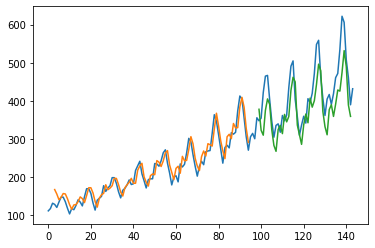

92/92 - 2s - loss: 0.0048
92/92 - 0s - loss: 0.0096
92/92 - 0s - loss: 0.0070
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s -

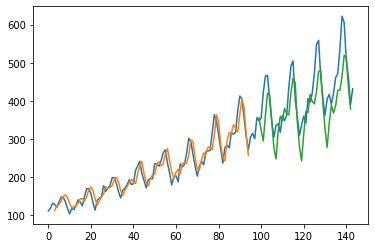

92/92 - 2s - loss: 0.0068
92/92 - 0s - loss: 0.0149
92/92 - 0s - loss: 0.0090
92/92 - 0s - loss: 0.0062
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s -

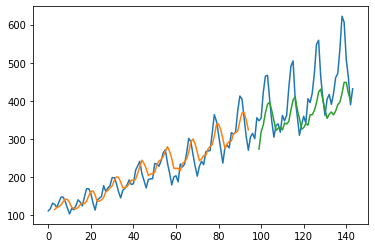

92/92 - 2s - loss: 0.0056
92/92 - 0s - loss: 0.0130
92/92 - 0s - loss: 0.0093
92/92 - 0s - loss: 0.0074
92/92 - 0s - loss: 0.0062
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s -

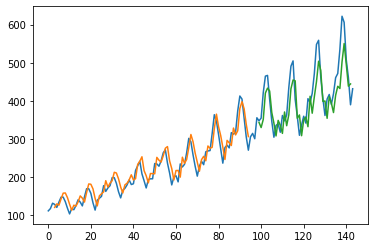

92/92 - 2s - loss: 0.0035
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0025
92/92 - 0s - loss: 0.0025
92/92 - 0s - loss: 0.0025
92/92 - 0s - loss: 0.0024
92/92 - 0s - loss: 0.0024
92/92 - 0s - loss: 0.0024
92/92 - 0s - loss: 0.0023
92/92 - 0s - loss: 0.0023
92/92 - 0s -

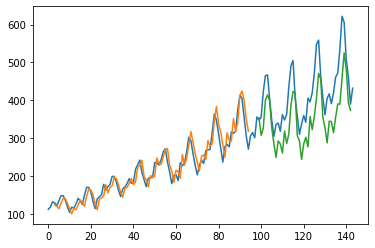

92/92 - 2s - loss: 0.0042
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s -

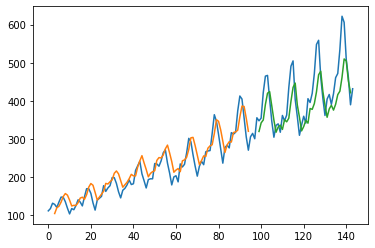

92/92 - 2s - loss: 0.0058
92/92 - 0s - loss: 0.0130
92/92 - 0s - loss: 0.0096
92/92 - 0s - loss: 0.0077
92/92 - 0s - loss: 0.0067
92/92 - 0s - loss: 0.0062
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s -

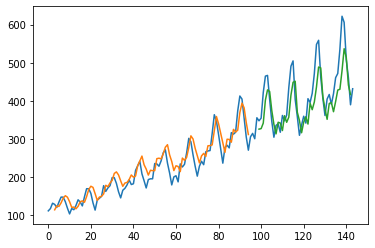

92/92 - 2s - loss: 0.0041
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s -

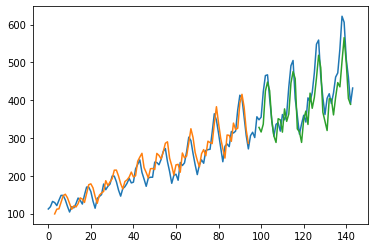

92/92 - 2s - loss: 0.0044
92/92 - 0s - loss: 0.0079
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s -

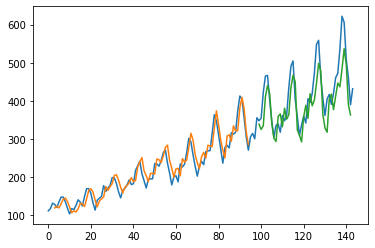

92/92 - 2s - loss: 0.0039
92/92 - 0s - loss: 0.0068
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s -

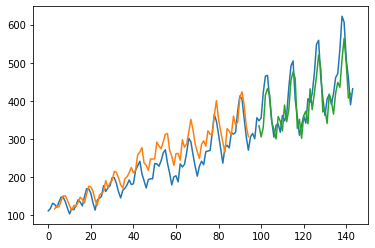

models  ... test_score_RMSE
0  <keras.engine.sequential.Sequential object at ...  ...       57.847147
1  <keras.engine.sequential.Sequential object at ...  ...       63.537697
2  <keras.engine.sequential.Sequential object at ...  ...       74.377136
3  <keras.engine.sequential.Sequential object at ...  ...       47.524074
4  <keras.engine.sequential.Sequential object at ...  ...       80.118731
5  <keras.engine.sequential.Sequential object at ...  ...       57.342979
6  <keras.engine.sequential.Sequential object at ...  ...       51.553790
7  <keras.engine.sequential.Sequential object at ...  ...       47.917653
8  <keras.engine.sequential.Sequential object at ...  ...       51.156600
9  <keras.engine.sequential.Sequential object at ...  ...       45.922960

[10 rows x 8 columns]

In [63]:
for i in range(10):
  if i<1:
    res_dict= get_results()
  else:
    res_dict = get_results(res_dict=res_dict)
pd.DataFrame(res_dict)

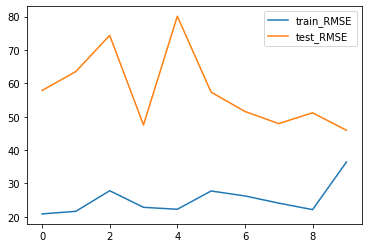

In [64]:
plt.plot(res_dict['train_score_RMSE'], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'], label='test_RMSE')
plt.legend()
plt.show()

In [65]:
score0_df = pd.DataFrame(res_dict)
score0_df.describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          3.0          1.0     1.0         25.176274        57.729877
std           0.0          0.0     0.0          4.672085        11.706977
min           3.0          1.0     1.0         20.830280        45.922960
25%           3.0          1.0     1.0         22.146217        48.727390
50%           3.0          1.0     1.0         23.435702        54.448384
75%           3.0          1.0     1.0         27.337371        62.115059
max           3.0          1.0     1.0         36.385444        80.118731

## StandardScaler()

92/92 - 2s - loss: 0.1603
92/92 - 0s - loss: 0.1049
92/92 - 0s - loss: 0.0896
92/92 - 0s - loss: 0.0823
92/92 - 0s - loss: 0.0772
92/92 - 0s - loss: 0.0736
92/92 - 0s - loss: 0.0708
92/92 - 0s - loss: 0.0686
92/92 - 0s - loss: 0.0668
92/92 - 0s - loss: 0.0652
92/92 - 0s - loss: 0.0638
92/92 - 0s - loss: 0.0626
92/92 - 0s - loss: 0.0614
92/92 - 0s - loss: 0.0603
92/92 - 0s - loss: 0.0592
92/92 - 0s - loss: 0.0582
92/92 - 0s - loss: 0.0572
92/92 - 0s - loss: 0.0562
92/92 - 0s - loss: 0.0552
92/92 - 0s - loss: 0.0543
92/92 - 0s - loss: 0.0533
92/92 - 0s - loss: 0.0524
92/92 - 0s - loss: 0.0515
92/92 - 0s - loss: 0.0505
92/92 - 0s - loss: 0.0496
92/92 - 0s - loss: 0.0487
92/92 - 0s - loss: 0.0478
92/92 - 0s - loss: 0.0469
92/92 - 0s - loss: 0.0460
92/92 - 0s - loss: 0.0452
92/92 - 0s - loss: 0.0443
92/92 - 0s - loss: 0.0435
92/92 - 0s - loss: 0.0428
92/92 - 0s - loss: 0.0420
92/92 - 0s - loss: 0.0413
92/92 - 0s - loss: 0.0406
92/92 - 0s - loss: 0.0399
92/92 - 0s - loss: 0.0393
92/92 - 0s -

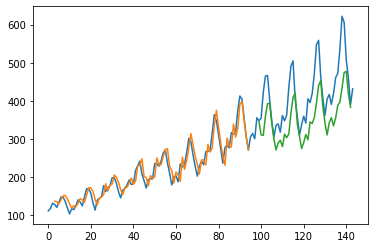

92/92 - 2s - loss: 1.2666
92/92 - 0s - loss: 0.7162
92/92 - 0s - loss: 0.4635
92/92 - 0s - loss: 0.3135
92/92 - 0s - loss: 0.1970
92/92 - 0s - loss: 0.1345
92/92 - 0s - loss: 0.1121
92/92 - 0s - loss: 0.1045
92/92 - 0s - loss: 0.1003
92/92 - 0s - loss: 0.0969
92/92 - 0s - loss: 0.0940
92/92 - 0s - loss: 0.0914
92/92 - 0s - loss: 0.0891
92/92 - 0s - loss: 0.0869
92/92 - 0s - loss: 0.0849
92/92 - 0s - loss: 0.0831
92/92 - 0s - loss: 0.0814
92/92 - 0s - loss: 0.0798
92/92 - 0s - loss: 0.0783
92/92 - 0s - loss: 0.0768
92/92 - 0s - loss: 0.0754
92/92 - 0s - loss: 0.0741
92/92 - 0s - loss: 0.0728
92/92 - 0s - loss: 0.0716
92/92 - 0s - loss: 0.0704
92/92 - 0s - loss: 0.0692
92/92 - 0s - loss: 0.0680
92/92 - 0s - loss: 0.0669
92/92 - 0s - loss: 0.0658
92/92 - 0s - loss: 0.0647
92/92 - 0s - loss: 0.0637
92/92 - 0s - loss: 0.0626
92/92 - 0s - loss: 0.0616
92/92 - 0s - loss: 0.0606
92/92 - 0s - loss: 0.0597
92/92 - 0s - loss: 0.0587
92/92 - 0s - loss: 0.0578
92/92 - 0s - loss: 0.0569
92/92 - 0s -

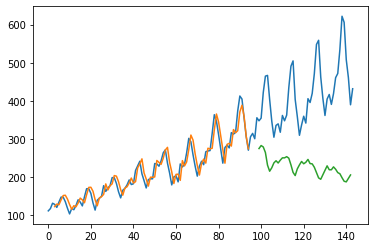

92/92 - 2s - loss: 0.4547
92/92 - 0s - loss: 0.2598
92/92 - 0s - loss: 0.1777
92/92 - 0s - loss: 0.1405
92/92 - 0s - loss: 0.1191
92/92 - 0s - loss: 0.1049
92/92 - 0s - loss: 0.0949
92/92 - 0s - loss: 0.0877
92/92 - 0s - loss: 0.0823
92/92 - 0s - loss: 0.0783
92/92 - 0s - loss: 0.0752
92/92 - 0s - loss: 0.0728
92/92 - 0s - loss: 0.0707
92/92 - 0s - loss: 0.0690
92/92 - 0s - loss: 0.0675
92/92 - 0s - loss: 0.0662
92/92 - 0s - loss: 0.0650
92/92 - 0s - loss: 0.0638
92/92 - 0s - loss: 0.0628
92/92 - 0s - loss: 0.0618
92/92 - 0s - loss: 0.0609
92/92 - 0s - loss: 0.0600
92/92 - 0s - loss: 0.0591
92/92 - 0s - loss: 0.0583
92/92 - 0s - loss: 0.0575
92/92 - 0s - loss: 0.0567
92/92 - 0s - loss: 0.0559
92/92 - 0s - loss: 0.0552
92/92 - 0s - loss: 0.0544
92/92 - 0s - loss: 0.0537
92/92 - 0s - loss: 0.0530
92/92 - 0s - loss: 0.0523
92/92 - 0s - loss: 0.0516
92/92 - 0s - loss: 0.0509
92/92 - 0s - loss: 0.0502
92/92 - 0s - loss: 0.0495
92/92 - 0s - loss: 0.0489
92/92 - 0s - loss: 0.0482
92/92 - 0s -

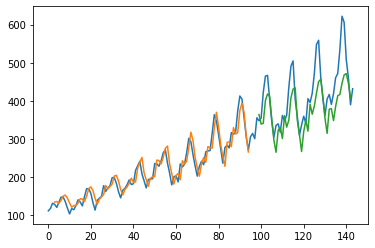

92/92 - 2s - loss: 1.3937
92/92 - 0s - loss: 0.9636
92/92 - 0s - loss: 0.7019
92/92 - 0s - loss: 0.4989
92/92 - 0s - loss: 0.3334
92/92 - 0s - loss: 0.2360
92/92 - 0s - loss: 0.1859
92/92 - 0s - loss: 0.1538
92/92 - 0s - loss: 0.1315
92/92 - 0s - loss: 0.1164
92/92 - 0s - loss: 0.1069
92/92 - 0s - loss: 0.1011
92/92 - 0s - loss: 0.0974
92/92 - 0s - loss: 0.0947
92/92 - 0s - loss: 0.0924
92/92 - 0s - loss: 0.0902
92/92 - 0s - loss: 0.0881
92/92 - 0s - loss: 0.0862
92/92 - 0s - loss: 0.0843
92/92 - 0s - loss: 0.0825
92/92 - 0s - loss: 0.0808
92/92 - 0s - loss: 0.0792
92/92 - 0s - loss: 0.0777
92/92 - 0s - loss: 0.0762
92/92 - 0s - loss: 0.0748
92/92 - 0s - loss: 0.0735
92/92 - 0s - loss: 0.0722
92/92 - 0s - loss: 0.0710
92/92 - 0s - loss: 0.0698
92/92 - 0s - loss: 0.0686
92/92 - 0s - loss: 0.0675
92/92 - 0s - loss: 0.0664
92/92 - 0s - loss: 0.0653
92/92 - 0s - loss: 0.0643
92/92 - 0s - loss: 0.0633
92/92 - 0s - loss: 0.0623
92/92 - 0s - loss: 0.0613
92/92 - 0s - loss: 0.0604
92/92 - 0s -

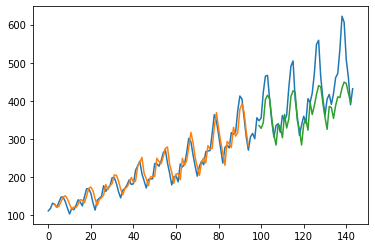

92/92 - 2s - loss: 0.6538
92/92 - 0s - loss: 0.4539
92/92 - 0s - loss: 0.3078
92/92 - 0s - loss: 0.2129
92/92 - 0s - loss: 0.1604
92/92 - 0s - loss: 0.1294
92/92 - 0s - loss: 0.1102
92/92 - 0s - loss: 0.0986
92/92 - 0s - loss: 0.0915
92/92 - 0s - loss: 0.0871
92/92 - 0s - loss: 0.0841
92/92 - 0s - loss: 0.0819
92/92 - 0s - loss: 0.0801
92/92 - 0s - loss: 0.0786
92/92 - 0s - loss: 0.0772
92/92 - 0s - loss: 0.0760
92/92 - 0s - loss: 0.0748
92/92 - 0s - loss: 0.0737
92/92 - 0s - loss: 0.0726
92/92 - 0s - loss: 0.0716
92/92 - 0s - loss: 0.0707
92/92 - 0s - loss: 0.0697
92/92 - 0s - loss: 0.0688
92/92 - 0s - loss: 0.0679
92/92 - 0s - loss: 0.0671
92/92 - 0s - loss: 0.0662
92/92 - 0s - loss: 0.0653
92/92 - 0s - loss: 0.0645
92/92 - 0s - loss: 0.0636
92/92 - 0s - loss: 0.0628
92/92 - 0s - loss: 0.0619
92/92 - 0s - loss: 0.0610
92/92 - 0s - loss: 0.0602
92/92 - 0s - loss: 0.0593
92/92 - 0s - loss: 0.0584
92/92 - 0s - loss: 0.0576
92/92 - 0s - loss: 0.0567
92/92 - 0s - loss: 0.0558
92/92 - 0s -

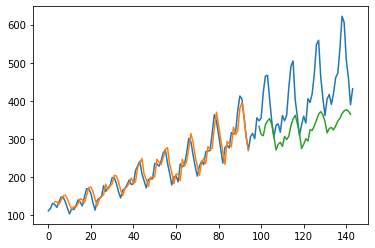

92/92 - 2s - loss: 1.1060
92/92 - 0s - loss: 0.7423
92/92 - 0s - loss: 0.4995
92/92 - 0s - loss: 0.3429
92/92 - 0s - loss: 0.2475
92/92 - 0s - loss: 0.1916
92/92 - 0s - loss: 0.1560
92/92 - 0s - loss: 0.1323
92/92 - 0s - loss: 0.1168
92/92 - 0s - loss: 0.1067
92/92 - 0s - loss: 0.0997
92/92 - 0s - loss: 0.0945
92/92 - 0s - loss: 0.0903
92/92 - 0s - loss: 0.0867
92/92 - 0s - loss: 0.0837
92/92 - 0s - loss: 0.0810
92/92 - 0s - loss: 0.0786
92/92 - 0s - loss: 0.0765
92/92 - 0s - loss: 0.0745
92/92 - 0s - loss: 0.0727
92/92 - 0s - loss: 0.0711
92/92 - 0s - loss: 0.0696
92/92 - 0s - loss: 0.0682
92/92 - 0s - loss: 0.0670
92/92 - 0s - loss: 0.0658
92/92 - 0s - loss: 0.0647
92/92 - 0s - loss: 0.0637
92/92 - 0s - loss: 0.0627
92/92 - 0s - loss: 0.0617
92/92 - 0s - loss: 0.0608
92/92 - 0s - loss: 0.0598
92/92 - 0s - loss: 0.0589
92/92 - 0s - loss: 0.0581
92/92 - 0s - loss: 0.0572
92/92 - 0s - loss: 0.0564
92/92 - 0s - loss: 0.0555
92/92 - 0s - loss: 0.0547
92/92 - 0s - loss: 0.0539
92/92 - 0s -

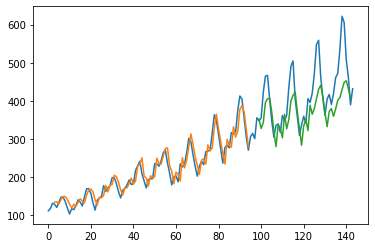

92/92 - 2s - loss: 0.0786
92/92 - 0s - loss: 0.0846
92/92 - 0s - loss: 0.0808
92/92 - 0s - loss: 0.0786
92/92 - 0s - loss: 0.0768
92/92 - 0s - loss: 0.0753
92/92 - 0s - loss: 0.0740
92/92 - 0s - loss: 0.0728
92/92 - 0s - loss: 0.0717
92/92 - 0s - loss: 0.0706
92/92 - 0s - loss: 0.0697
92/92 - 0s - loss: 0.0687
92/92 - 0s - loss: 0.0679
92/92 - 0s - loss: 0.0670
92/92 - 0s - loss: 0.0662
92/92 - 0s - loss: 0.0654
92/92 - 0s - loss: 0.0647
92/92 - 0s - loss: 0.0640
92/92 - 0s - loss: 0.0632
92/92 - 0s - loss: 0.0625
92/92 - 0s - loss: 0.0618
92/92 - 0s - loss: 0.0612
92/92 - 0s - loss: 0.0605
92/92 - 0s - loss: 0.0598
92/92 - 0s - loss: 0.0592
92/92 - 0s - loss: 0.0585
92/92 - 0s - loss: 0.0579
92/92 - 0s - loss: 0.0572
92/92 - 0s - loss: 0.0566
92/92 - 0s - loss: 0.0560
92/92 - 0s - loss: 0.0554
92/92 - 0s - loss: 0.0547
92/92 - 0s - loss: 0.0541
92/92 - 0s - loss: 0.0535
92/92 - 0s - loss: 0.0529
92/92 - 0s - loss: 0.0522
92/92 - 0s - loss: 0.0516
92/92 - 0s - loss: 0.0510
92/92 - 0s -

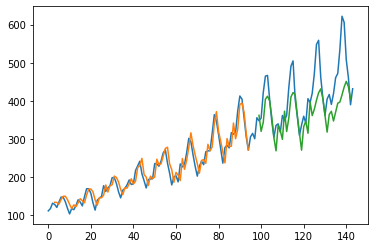

92/92 - 2s - loss: 0.4426
92/92 - 0s - loss: 0.2809
92/92 - 0s - loss: 0.2007
92/92 - 0s - loss: 0.1580
92/92 - 0s - loss: 0.1329
92/92 - 0s - loss: 0.1166
92/92 - 0s - loss: 0.1056
92/92 - 0s - loss: 0.0978
92/92 - 0s - loss: 0.0920
92/92 - 0s - loss: 0.0876
92/92 - 0s - loss: 0.0841
92/92 - 0s - loss: 0.0812
92/92 - 0s - loss: 0.0787
92/92 - 0s - loss: 0.0765
92/92 - 0s - loss: 0.0745
92/92 - 0s - loss: 0.0728
92/92 - 0s - loss: 0.0712
92/92 - 0s - loss: 0.0698
92/92 - 0s - loss: 0.0684
92/92 - 0s - loss: 0.0671
92/92 - 0s - loss: 0.0659
92/92 - 0s - loss: 0.0648
92/92 - 0s - loss: 0.0637
92/92 - 0s - loss: 0.0627
92/92 - 0s - loss: 0.0617
92/92 - 0s - loss: 0.0607
92/92 - 0s - loss: 0.0598
92/92 - 0s - loss: 0.0589
92/92 - 0s - loss: 0.0580
92/92 - 0s - loss: 0.0572
92/92 - 0s - loss: 0.0564
92/92 - 0s - loss: 0.0556
92/92 - 0s - loss: 0.0548
92/92 - 0s - loss: 0.0540
92/92 - 0s - loss: 0.0532
92/92 - 0s - loss: 0.0525
92/92 - 0s - loss: 0.0518
92/92 - 0s - loss: 0.0511
92/92 - 0s -

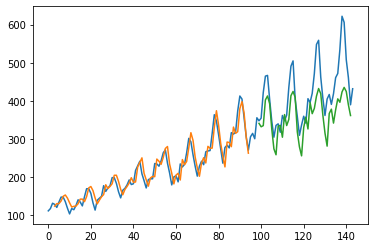

92/92 - 2s - loss: 0.8560
92/92 - 0s - loss: 0.6117
92/92 - 0s - loss: 0.4569
92/92 - 0s - loss: 0.3339
92/92 - 0s - loss: 0.2276
92/92 - 0s - loss: 0.1575
92/92 - 0s - loss: 0.1217
92/92 - 0s - loss: 0.1034
92/92 - 0s - loss: 0.0935
92/92 - 0s - loss: 0.0877
92/92 - 0s - loss: 0.0839
92/92 - 0s - loss: 0.0811
92/92 - 0s - loss: 0.0787
92/92 - 0s - loss: 0.0766
92/92 - 0s - loss: 0.0747
92/92 - 0s - loss: 0.0729
92/92 - 0s - loss: 0.0712
92/92 - 0s - loss: 0.0696
92/92 - 0s - loss: 0.0680
92/92 - 0s - loss: 0.0664
92/92 - 0s - loss: 0.0648
92/92 - 0s - loss: 0.0633
92/92 - 0s - loss: 0.0618
92/92 - 0s - loss: 0.0603
92/92 - 0s - loss: 0.0588
92/92 - 0s - loss: 0.0574
92/92 - 0s - loss: 0.0560
92/92 - 0s - loss: 0.0546
92/92 - 0s - loss: 0.0533
92/92 - 0s - loss: 0.0521
92/92 - 0s - loss: 0.0509
92/92 - 0s - loss: 0.0497
92/92 - 0s - loss: 0.0487
92/92 - 0s - loss: 0.0476
92/92 - 0s - loss: 0.0467
92/92 - 0s - loss: 0.0458
92/92 - 0s - loss: 0.0449
92/92 - 0s - loss: 0.0441
92/92 - 0s -

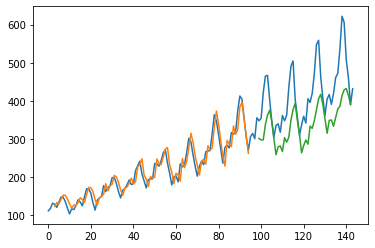

92/92 - 2s - loss: 1.0474
92/92 - 0s - loss: 0.6568
92/92 - 0s - loss: 0.4344
92/92 - 0s - loss: 0.3336
92/92 - 0s - loss: 0.2811
92/92 - 0s - loss: 0.2458
92/92 - 0s - loss: 0.2189
92/92 - 0s - loss: 0.1972
92/92 - 0s - loss: 0.1789
92/92 - 0s - loss: 0.1632
92/92 - 0s - loss: 0.1497
92/92 - 0s - loss: 0.1383
92/92 - 0s - loss: 0.1291
92/92 - 0s - loss: 0.1218
92/92 - 0s - loss: 0.1159
92/92 - 0s - loss: 0.1111
92/92 - 0s - loss: 0.1071
92/92 - 0s - loss: 0.1034
92/92 - 0s - loss: 0.1000
92/92 - 0s - loss: 0.0968
92/92 - 0s - loss: 0.0937
92/92 - 0s - loss: 0.0907
92/92 - 0s - loss: 0.0877
92/92 - 0s - loss: 0.0848
92/92 - 0s - loss: 0.0819
92/92 - 0s - loss: 0.0791
92/92 - 0s - loss: 0.0763
92/92 - 0s - loss: 0.0736
92/92 - 0s - loss: 0.0710
92/92 - 0s - loss: 0.0684
92/92 - 0s - loss: 0.0660
92/92 - 0s - loss: 0.0637
92/92 - 0s - loss: 0.0616
92/92 - 0s - loss: 0.0596
92/92 - 0s - loss: 0.0577
92/92 - 0s - loss: 0.0560
92/92 - 0s - loss: 0.0544
92/92 - 0s - loss: 0.0529
92/92 - 0s -

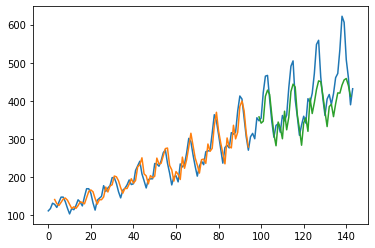

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
5   <keras.engine.sequential.Sequential object at ...  ...       57.342979
6   <keras.engine.sequential.Sequential object at ...  ...       51.553790
7   <keras.engine.sequential.Sequential object at ...  ...       47.917653
8   <keras.engine.sequential.Sequential object at ...  ...       51.156600
9   <keras.engine.sequential.Sequential object at ...  ...       45.922960
10  <keras.engine.sequential.Sequential object at ...  ...       80.730726
11  <keras.engine.sequential.Sequential object at ...  ...      211.646789
12  <keras.engine.sequential.Sequential object at ...  ...       65.009295
13  <keras.engine.sequential.Sequential object at ...  ...       66.659187
14  <keras.engine.sequential.Sequential object at ...  ...      108.133024
15  <keras.engine.sequential.Sequential object at ...  ...       69.576344
16  <keras.engine.sequential.Sequential object at ...  ...       73.232626
17  <keras.engine.sequential.Sequential object at ...  ...       75.383544
18  <keras.engine.sequential.Sequential object at ...  ...       93.500418
19  <keras.engine.sequential.Sequential object at ...  ...       61.962917

[20 rows x 8 columns]

In [66]:
for i in range(10):
  res_dict = get_results(scaler=StandardScaler(),
                         look_back=3,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [79]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[10:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          3.0          1.0     1.0         20.760631        90.583487
std           0.0          0.0     0.0          0.376176        44.831578
min           3.0          1.0     1.0         20.197578        61.962917
25%           3.0          1.0     1.0         20.613033        67.388477
50%           3.0          1.0     1.0         20.696024        74.308085
75%           3.0          1.0     1.0         21.034396        90.307995
max           3.0          1.0     1.0         21.400746       211.646789

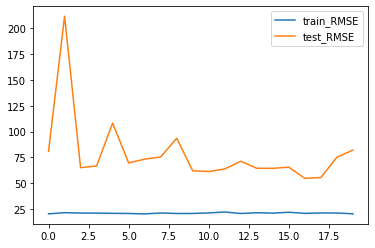

In [81]:
plt.plot(res_dict['train_score_RMSE'][10:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][10:], label='test_RMSE')
plt.legend()
plt.show()

## RobustScaler()

92/92 - 2s - loss: 0.0686
92/92 - 0s - loss: 0.0494
92/92 - 0s - loss: 0.0425
92/92 - 0s - loss: 0.0394
92/92 - 0s - loss: 0.0375
92/92 - 0s - loss: 0.0364
92/92 - 0s - loss: 0.0356
92/92 - 0s - loss: 0.0348
92/92 - 0s - loss: 0.0342
92/92 - 0s - loss: 0.0336
92/92 - 0s - loss: 0.0331
92/92 - 0s - loss: 0.0326
92/92 - 0s - loss: 0.0320
92/92 - 0s - loss: 0.0316
92/92 - 0s - loss: 0.0311
92/92 - 0s - loss: 0.0306
92/92 - 0s - loss: 0.0302
92/92 - 0s - loss: 0.0298
92/92 - 0s - loss: 0.0293
92/92 - 0s - loss: 0.0289
92/92 - 0s - loss: 0.0285
92/92 - 0s - loss: 0.0281
92/92 - 0s - loss: 0.0277
92/92 - 0s - loss: 0.0273
92/92 - 0s - loss: 0.0269
92/92 - 0s - loss: 0.0265
92/92 - 0s - loss: 0.0261
92/92 - 0s - loss: 0.0258
92/92 - 0s - loss: 0.0254
92/92 - 0s - loss: 0.0250
92/92 - 0s - loss: 0.0247
92/92 - 0s - loss: 0.0243
92/92 - 0s - loss: 0.0239
92/92 - 0s - loss: 0.0236
92/92 - 0s - loss: 0.0232
92/92 - 0s - loss: 0.0229
92/92 - 0s - loss: 0.0225
92/92 - 0s - loss: 0.0222
92/92 - 0s -

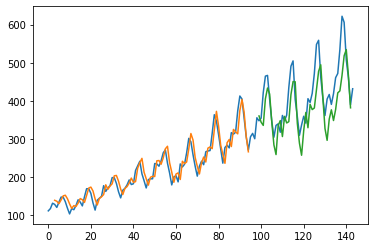

92/92 - 2s - loss: 0.5449
92/92 - 0s - loss: 0.2951
92/92 - 0s - loss: 0.1857
92/92 - 0s - loss: 0.1317
92/92 - 0s - loss: 0.1005
92/92 - 0s - loss: 0.0808
92/92 - 0s - loss: 0.0681
92/92 - 0s - loss: 0.0600
92/92 - 0s - loss: 0.0549
92/92 - 0s - loss: 0.0517
92/92 - 0s - loss: 0.0495
92/92 - 0s - loss: 0.0479
92/92 - 0s - loss: 0.0465
92/92 - 0s - loss: 0.0454
92/92 - 0s - loss: 0.0444
92/92 - 0s - loss: 0.0435
92/92 - 0s - loss: 0.0426
92/92 - 0s - loss: 0.0418
92/92 - 0s - loss: 0.0411
92/92 - 0s - loss: 0.0404
92/92 - 0s - loss: 0.0398
92/92 - 0s - loss: 0.0392
92/92 - 0s - loss: 0.0386
92/92 - 0s - loss: 0.0381
92/92 - 0s - loss: 0.0376
92/92 - 0s - loss: 0.0371
92/92 - 0s - loss: 0.0366
92/92 - 0s - loss: 0.0362
92/92 - 0s - loss: 0.0358
92/92 - 0s - loss: 0.0354
92/92 - 0s - loss: 0.0350
92/92 - 0s - loss: 0.0346
92/92 - 0s - loss: 0.0342
92/92 - 0s - loss: 0.0339
92/92 - 0s - loss: 0.0335
92/92 - 0s - loss: 0.0332
92/92 - 0s - loss: 0.0329
92/92 - 0s - loss: 0.0325
92/92 - 0s -

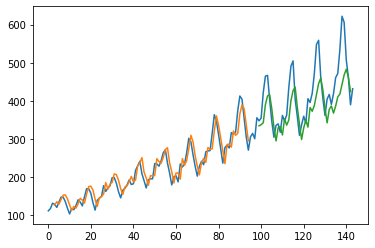

92/92 - 2s - loss: 0.2976
92/92 - 0s - loss: 0.2046
92/92 - 0s - loss: 0.1338
92/92 - 0s - loss: 0.0893
92/92 - 0s - loss: 0.0663
92/92 - 0s - loss: 0.0537
92/92 - 0s - loss: 0.0474
92/92 - 0s - loss: 0.0443
92/92 - 0s - loss: 0.0425
92/92 - 0s - loss: 0.0411
92/92 - 0s - loss: 0.0400
92/92 - 0s - loss: 0.0391
92/92 - 0s - loss: 0.0382
92/92 - 0s - loss: 0.0373
92/92 - 0s - loss: 0.0365
92/92 - 0s - loss: 0.0358
92/92 - 0s - loss: 0.0350
92/92 - 0s - loss: 0.0344
92/92 - 0s - loss: 0.0337
92/92 - 0s - loss: 0.0331
92/92 - 0s - loss: 0.0325
92/92 - 0s - loss: 0.0319
92/92 - 0s - loss: 0.0313
92/92 - 0s - loss: 0.0308
92/92 - 0s - loss: 0.0302
92/92 - 0s - loss: 0.0297
92/92 - 0s - loss: 0.0292
92/92 - 0s - loss: 0.0286
92/92 - 0s - loss: 0.0281
92/92 - 0s - loss: 0.0276
92/92 - 0s - loss: 0.0271
92/92 - 0s - loss: 0.0266
92/92 - 0s - loss: 0.0261
92/92 - 0s - loss: 0.0256
92/92 - 0s - loss: 0.0251
92/92 - 0s - loss: 0.0246
92/92 - 0s - loss: 0.0241
92/92 - 0s - loss: 0.0236
92/92 - 0s -

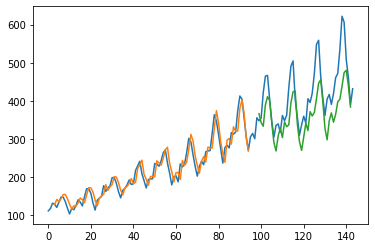

92/92 - 2s - loss: 0.4162
92/92 - 0s - loss: 0.2711
92/92 - 0s - loss: 0.1895
92/92 - 0s - loss: 0.1427
92/92 - 0s - loss: 0.1113
92/92 - 0s - loss: 0.0886
92/92 - 0s - loss: 0.0727
92/92 - 0s - loss: 0.0624
92/92 - 0s - loss: 0.0560
92/92 - 0s - loss: 0.0520
92/92 - 0s - loss: 0.0492
92/92 - 0s - loss: 0.0471
92/92 - 0s - loss: 0.0452
92/92 - 0s - loss: 0.0437
92/92 - 0s - loss: 0.0422
92/92 - 0s - loss: 0.0410
92/92 - 0s - loss: 0.0398
92/92 - 0s - loss: 0.0388
92/92 - 0s - loss: 0.0378
92/92 - 0s - loss: 0.0370
92/92 - 0s - loss: 0.0362
92/92 - 0s - loss: 0.0354
92/92 - 0s - loss: 0.0347
92/92 - 0s - loss: 0.0341
92/92 - 0s - loss: 0.0335
92/92 - 0s - loss: 0.0329
92/92 - 0s - loss: 0.0323
92/92 - 0s - loss: 0.0318
92/92 - 0s - loss: 0.0313
92/92 - 0s - loss: 0.0308
92/92 - 0s - loss: 0.0303
92/92 - 0s - loss: 0.0298
92/92 - 0s - loss: 0.0294
92/92 - 0s - loss: 0.0289
92/92 - 0s - loss: 0.0285
92/92 - 0s - loss: 0.0280
92/92 - 0s - loss: 0.0276
92/92 - 0s - loss: 0.0271
92/92 - 0s -

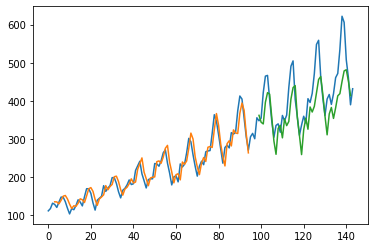

92/92 - 2s - loss: 0.1960
92/92 - 0s - loss: 0.1098
92/92 - 0s - loss: 0.0744
92/92 - 0s - loss: 0.0579
92/92 - 0s - loss: 0.0490
92/92 - 0s - loss: 0.0438
92/92 - 0s - loss: 0.0408
92/92 - 0s - loss: 0.0391
92/92 - 0s - loss: 0.0379
92/92 - 0s - loss: 0.0371
92/92 - 0s - loss: 0.0364
92/92 - 0s - loss: 0.0357
92/92 - 0s - loss: 0.0351
92/92 - 0s - loss: 0.0346
92/92 - 0s - loss: 0.0340
92/92 - 0s - loss: 0.0335
92/92 - 0s - loss: 0.0330
92/92 - 0s - loss: 0.0325
92/92 - 0s - loss: 0.0321
92/92 - 0s - loss: 0.0316
92/92 - 0s - loss: 0.0311
92/92 - 0s - loss: 0.0307
92/92 - 0s - loss: 0.0303
92/92 - 0s - loss: 0.0298
92/92 - 0s - loss: 0.0294
92/92 - 0s - loss: 0.0290
92/92 - 0s - loss: 0.0286
92/92 - 0s - loss: 0.0282
92/92 - 0s - loss: 0.0279
92/92 - 0s - loss: 0.0275
92/92 - 0s - loss: 0.0271
92/92 - 0s - loss: 0.0267
92/92 - 0s - loss: 0.0264
92/92 - 0s - loss: 0.0260
92/92 - 0s - loss: 0.0256
92/92 - 0s - loss: 0.0253
92/92 - 0s - loss: 0.0249
92/92 - 0s - loss: 0.0245
92/92 - 0s -

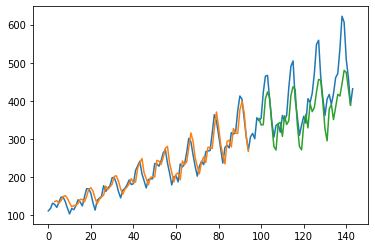

92/92 - 3s - loss: 0.4205
92/92 - 0s - loss: 0.2083
92/92 - 0s - loss: 0.1359
92/92 - 0s - loss: 0.1026
92/92 - 0s - loss: 0.0833
92/92 - 0s - loss: 0.0712
92/92 - 0s - loss: 0.0634
92/92 - 0s - loss: 0.0582
92/92 - 0s - loss: 0.0545
92/92 - 0s - loss: 0.0517
92/92 - 0s - loss: 0.0494
92/92 - 0s - loss: 0.0474
92/92 - 0s - loss: 0.0457
92/92 - 0s - loss: 0.0441
92/92 - 0s - loss: 0.0427
92/92 - 0s - loss: 0.0415
92/92 - 0s - loss: 0.0403
92/92 - 0s - loss: 0.0393
92/92 - 0s - loss: 0.0383
92/92 - 0s - loss: 0.0374
92/92 - 0s - loss: 0.0365
92/92 - 0s - loss: 0.0357
92/92 - 0s - loss: 0.0350
92/92 - 0s - loss: 0.0342
92/92 - 0s - loss: 0.0336
92/92 - 0s - loss: 0.0329
92/92 - 0s - loss: 0.0323
92/92 - 0s - loss: 0.0317
92/92 - 0s - loss: 0.0311
92/92 - 0s - loss: 0.0306
92/92 - 0s - loss: 0.0300
92/92 - 0s - loss: 0.0295
92/92 - 0s - loss: 0.0290
92/92 - 0s - loss: 0.0285
92/92 - 0s - loss: 0.0280
92/92 - 0s - loss: 0.0275
92/92 - 0s - loss: 0.0271
92/92 - 0s - loss: 0.0266
92/92 - 0s -

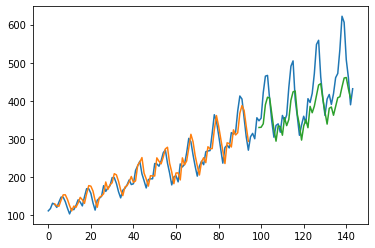

92/92 - 2s - loss: 0.0847
92/92 - 0s - loss: 0.0690
92/92 - 0s - loss: 0.0577
92/92 - 0s - loss: 0.0518
92/92 - 0s - loss: 0.0479
92/92 - 0s - loss: 0.0452
92/92 - 0s - loss: 0.0431
92/92 - 0s - loss: 0.0414
92/92 - 0s - loss: 0.0400
92/92 - 0s - loss: 0.0388
92/92 - 0s - loss: 0.0378
92/92 - 0s - loss: 0.0369
92/92 - 0s - loss: 0.0361
92/92 - 0s - loss: 0.0353
92/92 - 0s - loss: 0.0347
92/92 - 0s - loss: 0.0341
92/92 - 0s - loss: 0.0335
92/92 - 0s - loss: 0.0329
92/92 - 0s - loss: 0.0324
92/92 - 0s - loss: 0.0319
92/92 - 0s - loss: 0.0315
92/92 - 0s - loss: 0.0310
92/92 - 0s - loss: 0.0306
92/92 - 0s - loss: 0.0302
92/92 - 0s - loss: 0.0298
92/92 - 0s - loss: 0.0294
92/92 - 0s - loss: 0.0290
92/92 - 0s - loss: 0.0286
92/92 - 0s - loss: 0.0282
92/92 - 0s - loss: 0.0278
92/92 - 0s - loss: 0.0275
92/92 - 0s - loss: 0.0271
92/92 - 0s - loss: 0.0268
92/92 - 0s - loss: 0.0264
92/92 - 0s - loss: 0.0261
92/92 - 0s - loss: 0.0257
92/92 - 0s - loss: 0.0254
92/92 - 0s - loss: 0.0250
92/92 - 0s -

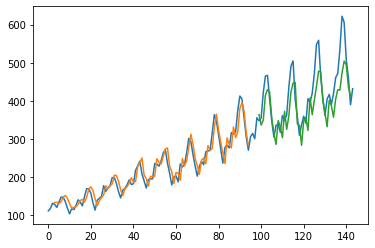

92/92 - 2s - loss: 0.4156
92/92 - 0s - loss: 0.3013
92/92 - 0s - loss: 0.2347
92/92 - 0s - loss: 0.1839
92/92 - 0s - loss: 0.1369
92/92 - 0s - loss: 0.0979
92/92 - 0s - loss: 0.0713
92/92 - 0s - loss: 0.0558
92/92 - 0s - loss: 0.0487
92/92 - 0s - loss: 0.0458
92/92 - 0s - loss: 0.0442
92/92 - 0s - loss: 0.0430
92/92 - 0s - loss: 0.0420
92/92 - 0s - loss: 0.0411
92/92 - 0s - loss: 0.0402
92/92 - 0s - loss: 0.0394
92/92 - 0s - loss: 0.0386
92/92 - 0s - loss: 0.0378
92/92 - 0s - loss: 0.0371
92/92 - 0s - loss: 0.0363
92/92 - 0s - loss: 0.0357
92/92 - 0s - loss: 0.0350
92/92 - 0s - loss: 0.0343
92/92 - 0s - loss: 0.0337
92/92 - 0s - loss: 0.0331
92/92 - 0s - loss: 0.0325
92/92 - 0s - loss: 0.0319
92/92 - 0s - loss: 0.0313
92/92 - 0s - loss: 0.0308
92/92 - 0s - loss: 0.0302
92/92 - 0s - loss: 0.0297
92/92 - 0s - loss: 0.0291
92/92 - 0s - loss: 0.0286
92/92 - 0s - loss: 0.0280
92/92 - 0s - loss: 0.0275
92/92 - 0s - loss: 0.0269
92/92 - 0s - loss: 0.0264
92/92 - 0s - loss: 0.0259
92/92 - 0s -

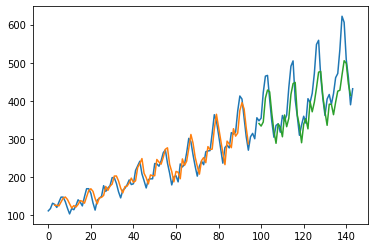

92/92 - 2s - loss: 0.4068
92/92 - 0s - loss: 0.2301
92/92 - 0s - loss: 0.1410
92/92 - 0s - loss: 0.0985
92/92 - 0s - loss: 0.0758
92/92 - 0s - loss: 0.0634
92/92 - 0s - loss: 0.0566
92/92 - 0s - loss: 0.0525
92/92 - 0s - loss: 0.0497
92/92 - 0s - loss: 0.0475
92/92 - 0s - loss: 0.0457
92/92 - 0s - loss: 0.0441
92/92 - 0s - loss: 0.0427
92/92 - 0s - loss: 0.0414
92/92 - 0s - loss: 0.0403
92/92 - 0s - loss: 0.0393
92/92 - 0s - loss: 0.0384
92/92 - 0s - loss: 0.0375
92/92 - 0s - loss: 0.0368
92/92 - 0s - loss: 0.0360
92/92 - 0s - loss: 0.0354
92/92 - 0s - loss: 0.0347
92/92 - 0s - loss: 0.0342
92/92 - 0s - loss: 0.0336
92/92 - 0s - loss: 0.0331
92/92 - 0s - loss: 0.0326
92/92 - 0s - loss: 0.0321
92/92 - 0s - loss: 0.0317
92/92 - 0s - loss: 0.0312
92/92 - 0s - loss: 0.0308
92/92 - 0s - loss: 0.0304
92/92 - 0s - loss: 0.0300
92/92 - 0s - loss: 0.0296
92/92 - 0s - loss: 0.0293
92/92 - 0s - loss: 0.0289
92/92 - 0s - loss: 0.0285
92/92 - 0s - loss: 0.0282
92/92 - 0s - loss: 0.0278
92/92 - 0s -

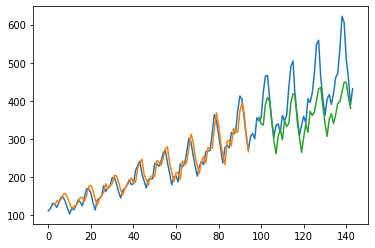

92/92 - 2s - loss: 0.0568
92/92 - 0s - loss: 0.0401
92/92 - 0s - loss: 0.0351
92/92 - 0s - loss: 0.0326
92/92 - 0s - loss: 0.0311
92/92 - 0s - loss: 0.0301
92/92 - 0s - loss: 0.0294
92/92 - 0s - loss: 0.0288
92/92 - 0s - loss: 0.0283
92/92 - 0s - loss: 0.0278
92/92 - 0s - loss: 0.0273
92/92 - 0s - loss: 0.0268
92/92 - 0s - loss: 0.0264
92/92 - 0s - loss: 0.0259
92/92 - 0s - loss: 0.0255
92/92 - 0s - loss: 0.0251
92/92 - 0s - loss: 0.0247
92/92 - 0s - loss: 0.0243
92/92 - 0s - loss: 0.0239
92/92 - 0s - loss: 0.0235
92/92 - 0s - loss: 0.0231
92/92 - 0s - loss: 0.0227
92/92 - 0s - loss: 0.0223
92/92 - 0s - loss: 0.0219
92/92 - 0s - loss: 0.0216
92/92 - 0s - loss: 0.0212
92/92 - 0s - loss: 0.0208
92/92 - 0s - loss: 0.0205
92/92 - 0s - loss: 0.0201
92/92 - 0s - loss: 0.0198
92/92 - 0s - loss: 0.0194
92/92 - 0s - loss: 0.0191
92/92 - 0s - loss: 0.0188
92/92 - 0s - loss: 0.0185
92/92 - 0s - loss: 0.0182
92/92 - 0s - loss: 0.0179
92/92 - 0s - loss: 0.0176
92/92 - 0s - loss: 0.0173
92/92 - 0s -

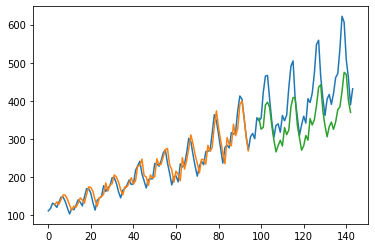

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
5   <keras.engine.sequential.Sequential object at ...  ...       57.342979
6   <keras.engine.sequential.Sequential object at ...  ...       51.553790
7   <keras.engine.sequential.Sequential object at ...  ...       47.917653
8   <keras.engine.sequential.Sequential object at ...  ...       51.156600
9   <keras.engine.sequential.Sequential object at ...  ...       45.922960
10  <keras.engine.sequential.Sequential object at ...  ...       80.730726
11  <keras.engine.sequential.Sequential object at ...  ...      211.646789
12  <keras.engine.sequential.Sequential object at ...  ...       65.009295
13  <keras.engine.sequential.Sequential object at ...  ...       66.659187
14  <keras.engine.sequential.Sequential object at ...  ...      108.133024
15  <keras.engine.sequential.Sequential object at ...  ...       69.576344
16  <keras.engine.sequential.Sequential object at ...  ...       73.232626
17  <keras.engine.sequential.Sequential object at ...  ...       75.383544
18  <keras.engine.sequential.Sequential object at ...  ...       93.500418
19  <keras.engine.sequential.Sequential object at ...  ...       61.962917
20  <keras.engine.sequential.Sequential object at ...  ...       61.239471
21  <keras.engine.sequential.Sequential object at ...  ...       63.767182
22  <keras.engine.sequential.Sequential object at ...  ...       71.156313
23  <keras.engine.sequential.Sequential object at ...  ...       64.400527
24  <keras.engine.sequential.Sequential object at ...  ...       64.352614
25  <keras.engine.sequential.Sequential object at ...  ...       65.453276
26  <keras.engine.sequential.Sequential object at ...  ...       54.690304
27  <keras.engine.sequential.Sequential object at ...  ...       55.459819
28  <keras.engine.sequential.Sequential object at ...  ...       75.098429
29  <keras.engine.sequential.Sequential object at ...  ...       82.009961

[30 rows x 8 columns]

In [80]:
for i in range(10):
  res_dict = get_results(scaler=RobustScaler(),
                         look_back=3,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [88]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[20:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          3.0          1.0     1.0         21.113484        65.762790
std           0.0          0.0     0.0          0.522758         8.415257
min           3.0          1.0     1.0         20.314304        54.690304
25%           3.0          1.0     1.0         20.801606        61.871399
50%           3.0          1.0     1.0         21.090860        64.376571
75%           3.0          1.0     1.0         21.267174        69.730554
max           3.0          1.0     1.0         22.054184        82.009961

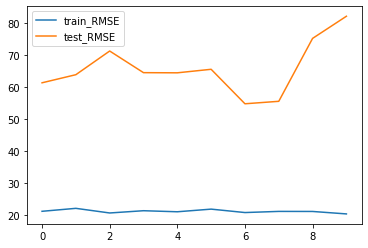

In [89]:
plt.plot(res_dict['train_score_RMSE'][20:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][20:], label='test_RMSE')
plt.legend()
plt.show()

## MaxAbsScaler()

92/92 - 2s - loss: 0.0145
92/92 - 0s - loss: 0.0075
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s -

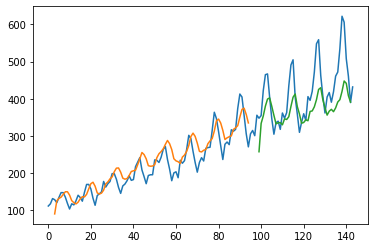

92/92 - 3s - loss: 0.0066
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s -

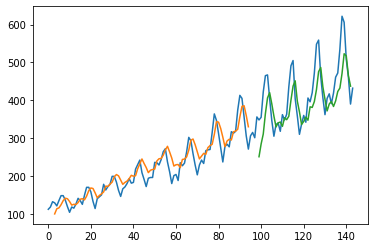

92/92 - 2s - loss: 0.0083
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s -

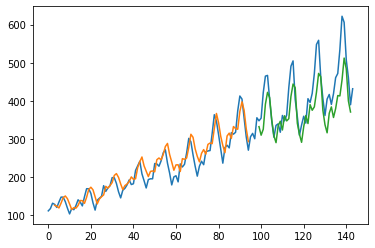

92/92 - 2s - loss: 0.0033
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s -

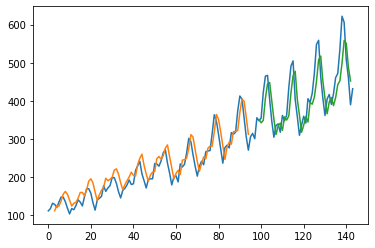

92/92 - 2s - loss: 0.0156
92/92 - 0s - loss: 0.0064
92/92 - 0s - loss: 0.0061
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s -

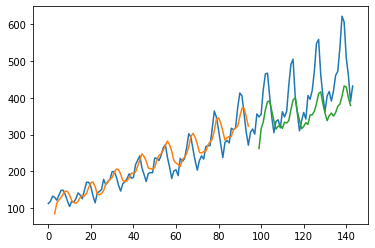

92/92 - 2s - loss: 0.0031
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0026
92/92 - 0s -

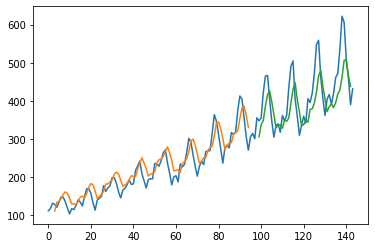

92/92 - 2s - loss: 0.0482
92/92 - 0s - loss: 0.0099
92/92 - 0s - loss: 0.0096
92/92 - 0s - loss: 0.0087
92/92 - 0s - loss: 0.0078
92/92 - 0s - loss: 0.0071
92/92 - 0s - loss: 0.0064
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s -

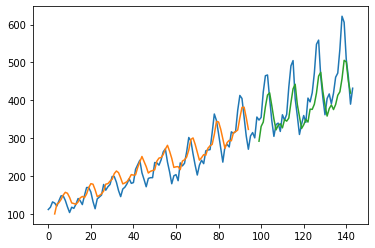

92/92 - 2s - loss: 0.0483
92/92 - 0s - loss: 0.0110
92/92 - 0s - loss: 0.0117
92/92 - 0s - loss: 0.0105
92/92 - 0s - loss: 0.0094
92/92 - 0s - loss: 0.0085
92/92 - 0s - loss: 0.0076
92/92 - 0s - loss: 0.0068
92/92 - 0s - loss: 0.0061
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s -

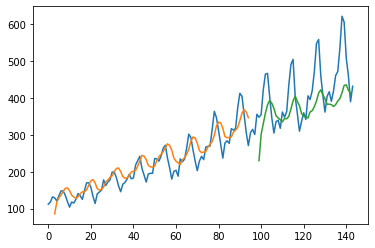

92/92 - 2s - loss: 0.0168
92/92 - 0s - loss: 0.0081
92/92 - 0s - loss: 0.0073
92/92 - 0s - loss: 0.0065
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s -

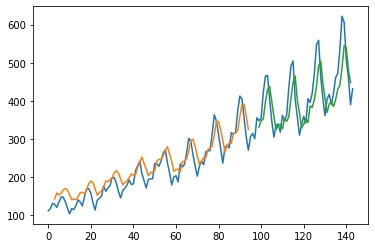

92/92 - 2s - loss: 0.0041
92/92 - 0s - loss: 0.0076
92/92 - 0s - loss: 0.0060
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0026
92/92 - 0s - loss: 0.0026
92/92 - 0s -

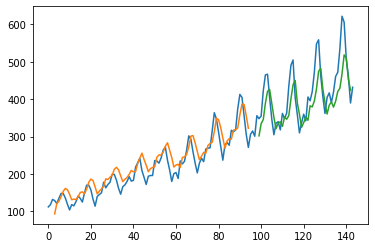

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
5   <keras.engine.sequential.Sequential object at ...  ...       57.342979
6   <keras.engine.sequential.Sequential object at ...  ...       51.553790
7   <keras.engine.sequential.Sequential object at ...  ...       47.917653
8   <keras.engine.sequential.Sequential object at ...  ...       51.156600
9   <keras.engine.sequential.Sequential object at ...  ...       45.922960
10  <keras.engine.sequential.Sequential object at ...  ...       80.730726
11  <keras.engine.sequential.Sequential object at ...  ...      211.646789
12  <keras.engine.sequential.Sequential object at ...  ...       65.009295
13  <keras.engine.sequential.Sequential object at ...  ...       66.659187
14  <keras.engine.sequential.Sequential object at ...  ...      108.133024
15  <keras.engine.sequential.Sequential object at ...  ...       69.576344
16  <keras.engine.sequential.Sequential object at ...  ...       73.232626
17  <keras.engine.sequential.Sequential object at ...  ...       75.383544
18  <keras.engine.sequential.Sequential object at ...  ...       93.500418
19  <keras.engine.sequential.Sequential object at ...  ...       61.962917
20  <keras.engine.sequential.Sequential object at ...  ...       61.239471
21  <keras.engine.sequential.Sequential object at ...  ...       63.767182
22  <keras.engine.sequential.Sequential object at ...  ...       71.156313
23  <keras.engine.sequential.Sequential object at ...  ...       64.400527
24  <keras.engine.sequential.Sequential object at ...  ...       64.352614
25  <keras.engine.sequential.Sequential object at ...  ...       65.453276
26  <keras.engine.sequential.Sequential object at ...  ...       54.690304
27  <keras.engine.sequential.Sequential object at ...  ...       55.459819
28  <keras.engine.sequential.Sequential object at ...  ...       75.098429
29  <keras.engine.sequential.Sequential object at ...  ...       82.009961
30  <keras.engine.sequential.Sequential object at ...  ...       73.114349
31  <keras.engine.sequential.Sequential object at ...  ...       60.519637
32  <keras.engine.sequential.Sequential object at ...  ...       60.992141
33  <keras.engine.sequential.Sequential object at ...  ...       49.486278
34  <keras.engine.sequential.Sequential object at ...  ...       82.317072
35  <keras.engine.sequential.Sequential object at ...  ...       58.839090
36  <keras.engine.sequential.Sequential object at ...  ...       59.809234
37  <keras.engine.sequential.Sequential object at ...  ...       78.614971
38  <keras.engine.sequential.Sequential object at ...  ...       52.636963
39  <keras.engine.sequential.Sequential object at ...  ...       56.044701

[40 rows x 8 columns]

In [90]:
for i in range(10):
  res_dict = get_results(scaler=MaxAbsScaler(),
                         look_back=3,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [94]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[30:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count   20.000000         20.0    20.0         20.000000        20.000000
mean     3.500000          1.0     1.0         26.930995        63.266681
std      0.512989          0.0     0.0          3.069471        16.459293
min      3.000000          1.0     1.0         20.787717        46.907184
25%      3.000000          1.0     1.0         25.242152        52.371317
50%      3.500000          1.0     1.0         26.877318        58.536284
75%      4.000000          1.0     1.0         28.766764        64.669606
max      4.000000          1.0     1.0         32.695776       103.889120

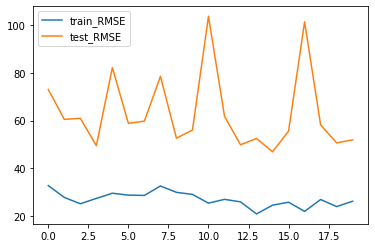

In [95]:
plt.plot(res_dict['train_score_RMSE'][30:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][30:], label='test_RMSE')
plt.legend()
plt.show()

## look_back=4

91/91 - 2s - loss: 0.0075
91/91 - 0s - loss: 0.0229
91/91 - 0s - loss: 0.0149
91/91 - 0s - loss: 0.0114
91/91 - 0s - loss: 0.0088
91/91 - 0s - loss: 0.0068
91/91 - 0s - loss: 0.0056
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0036
91/91 - 0s -

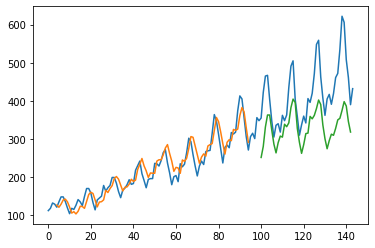

91/91 - 2s - loss: 0.0073
91/91 - 0s - loss: 0.0146
91/91 - 0s - loss: 0.0111
91/91 - 0s - loss: 0.0090
91/91 - 0s - loss: 0.0076
91/91 - 0s - loss: 0.0068
91/91 - 0s - loss: 0.0064
91/91 - 0s - loss: 0.0061
91/91 - 0s - loss: 0.0059
91/91 - 0s - loss: 0.0058
91/91 - 0s - loss: 0.0057
91/91 - 0s - loss: 0.0056
91/91 - 0s - loss: 0.0055
91/91 - 0s - loss: 0.0054
91/91 - 0s - loss: 0.0054
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s -

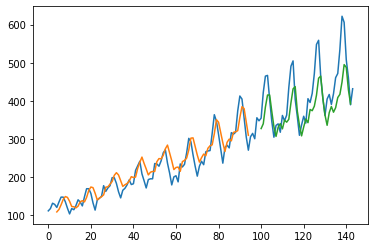

91/91 - 2s - loss: 0.0055
91/91 - 0s - loss: 0.0112
91/91 - 0s - loss: 0.0077
91/91 - 0s - loss: 0.0063
91/91 - 0s - loss: 0.0057
91/91 - 0s - loss: 0.0054
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s -

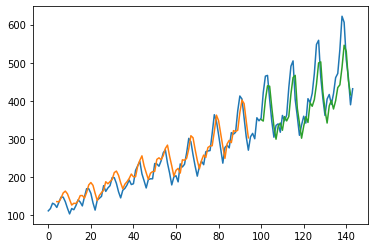

91/91 - 2s - loss: 0.0047
91/91 - 0s - loss: 0.0062
91/91 - 0s - loss: 0.0057
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0035
91/91 - 0s - loss: 0.0035
91/91 - 0s - loss: 0.0035
91/91 - 0s - loss: 0.0034
91/91 - 0s - loss: 0.0034
91/91 - 0s - loss: 0.0034
91/91 - 0s - loss: 0.0033
91/91 - 0s - loss: 0.0033
91/91 - 0s - loss: 0.0032
91/91 - 0s - loss: 0.0032
91/91 - 0s - loss: 0.0032
91/91 - 0s - loss: 0.0031
91/91 - 0s -

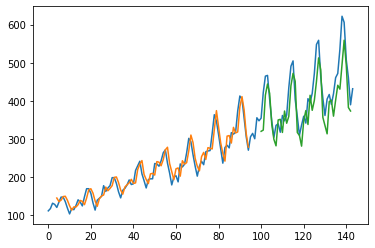

91/91 - 2s - loss: 0.0048
91/91 - 0s - loss: 0.0080
91/91 - 0s - loss: 0.0065
91/91 - 0s - loss: 0.0057
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0035
91/91 - 0s - loss: 0.0034
91/91 - 0s - loss: 0.0034
91/91 - 0s -

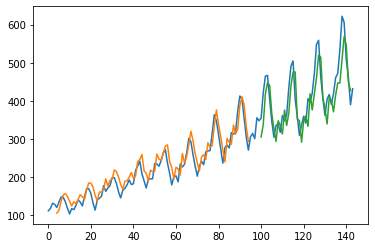

91/91 - 2s - loss: 0.0073
91/91 - 0s - loss: 0.0122
91/91 - 0s - loss: 0.0096
91/91 - 0s - loss: 0.0079
91/91 - 0s - loss: 0.0068
91/91 - 0s - loss: 0.0062
91/91 - 0s - loss: 0.0059
91/91 - 0s - loss: 0.0057
91/91 - 0s - loss: 0.0056
91/91 - 0s - loss: 0.0055
91/91 - 0s - loss: 0.0054
91/91 - 0s - loss: 0.0054
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s -

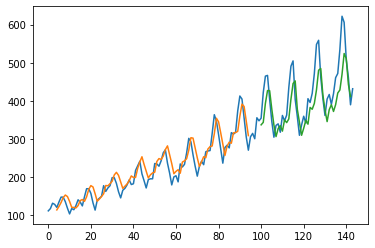

91/91 - 2s - loss: 0.0122
91/91 - 0s - loss: 0.0250
91/91 - 0s - loss: 0.0156
91/91 - 0s - loss: 0.0116
91/91 - 0s - loss: 0.0090
91/91 - 0s - loss: 0.0072
91/91 - 0s - loss: 0.0061
91/91 - 0s - loss: 0.0055
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0035
91/91 - 0s -

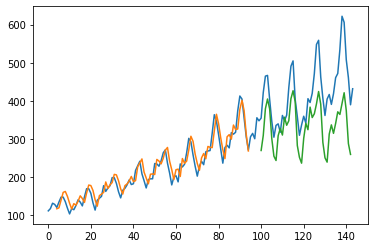

91/91 - 2s - loss: 0.0083
91/91 - 0s - loss: 0.0211
91/91 - 0s - loss: 0.0150
91/91 - 0s - loss: 0.0115
91/91 - 0s - loss: 0.0088
91/91 - 0s - loss: 0.0064
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s -

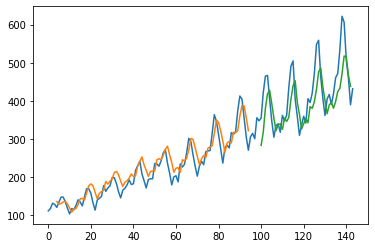

91/91 - 2s - loss: 0.0127
91/91 - 0s - loss: 0.0135
91/91 - 0s - loss: 0.0099
91/91 - 0s - loss: 0.0078
91/91 - 0s - loss: 0.0064
91/91 - 0s - loss: 0.0056
91/91 - 0s - loss: 0.0053
91/91 - 0s - loss: 0.0051
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0058
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s - loss: 0.0035
91/91 - 0s -

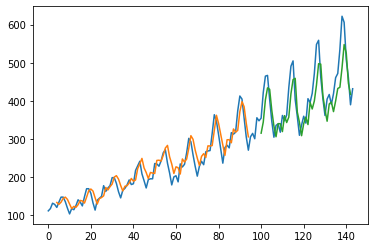

91/91 - 2s - loss: 0.0047
91/91 - 0s - loss: 0.0058
91/91 - 0s - loss: 0.0052
91/91 - 0s - loss: 0.0050
91/91 - 0s - loss: 0.0049
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0048
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0047
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0046
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0045
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0044
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0043
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0042
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0041
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0040
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0039
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0038
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0037
91/91 - 0s - loss: 0.0036
91/91 - 0s -

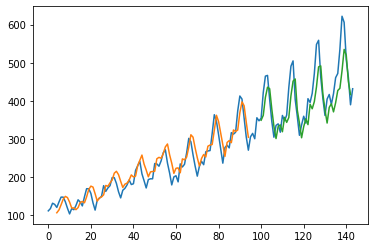

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
5   <keras.engine.sequential.Sequential object at ...  ...       57.342979
6   <keras.engine.sequential.Sequential object at ...  ...       51.553790
7   <keras.engine.sequential.Sequential object at ...  ...       47.917653
8   <keras.engine.sequential.Sequential object at ...  ...       51.156600
9   <keras.engine.sequential.Sequential object at ...  ...       45.922960
10  <keras.engine.sequential.Sequential object at ...  ...       80.730726
11  <keras.engine.sequential.Sequential object at ...  ...      211.646789
12  <keras.engine.sequential.Sequential object at ...  ...       65.009295
13  <keras.engine.sequential.Sequential object at ...  ...       66.659187
14  <keras.engine.sequential.Sequential object at ...  ...      108.133024
15  <keras.engine.sequential.Sequential object at ...  ...       69.576344
16  <keras.engine.sequential.Sequential object at ...  ...       73.232626
17  <keras.engine.sequential.Sequential object at ...  ...       75.383544
18  <keras.engine.sequential.Sequential object at ...  ...       93.500418
19  <keras.engine.sequential.Sequential object at ...  ...       61.962917
20  <keras.engine.sequential.Sequential object at ...  ...       61.239471
21  <keras.engine.sequential.Sequential object at ...  ...       63.767182
22  <keras.engine.sequential.Sequential object at ...  ...       71.156313
23  <keras.engine.sequential.Sequential object at ...  ...       64.400527
24  <keras.engine.sequential.Sequential object at ...  ...       64.352614
25  <keras.engine.sequential.Sequential object at ...  ...       65.453276
26  <keras.engine.sequential.Sequential object at ...  ...       54.690304
27  <keras.engine.sequential.Sequential object at ...  ...       55.459819
28  <keras.engine.sequential.Sequential object at ...  ...       75.098429
29  <keras.engine.sequential.Sequential object at ...  ...       82.009961
30  <keras.engine.sequential.Sequential object at ...  ...       73.114349
31  <keras.engine.sequential.Sequential object at ...  ...       60.519637
32  <keras.engine.sequential.Sequential object at ...  ...       60.992141
33  <keras.engine.sequential.Sequential object at ...  ...       49.486278
34  <keras.engine.sequential.Sequential object at ...  ...       82.317072
35  <keras.engine.sequential.Sequential object at ...  ...       58.839090
36  <keras.engine.sequential.Sequential object at ...  ...       59.809234
37  <keras.engine.sequential.Sequential object at ...  ...       78.614971
38  <keras.engine.sequential.Sequential object at ...  ...       52.636963
39  <keras.engine.sequential.Sequential object at ...  ...       56.044701
40  <keras.engine.sequential.Sequential object at ...  ...      103.889120
41  <keras.engine.sequential.Sequential object at ...  ...       61.854692
42  <keras.engine.sequential.Sequential object at ...  ...       49.847159
43  <keras.engine.sequential.Sequential object at ...  ...       52.520484
44  <keras.engine.sequential.Sequential object at ...  ...       46.907184
45  <keras.engine.sequential.Sequential object at ...  ...       55.603260
46  <keras.engine.sequential.Sequential object at ...  ...      101.540919
47  <keras.engine.sequential.Sequential object at ...  ...       58.233479
48  <keras.engine.sequential.Sequential object at ...  ...       50.639072
49  <keras.engine.sequential.Sequential object at ...  ...       51.923815

[50 rows x 8 columns]

In [93]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=4,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [96]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[40:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          4.0          1.0     1.0         24.770942        63.295918
std           0.0          0.0     0.0          2.064226        21.219647
min           4.0          1.0     1.0         20.787717        46.907184
25%           4.0          1.0     1.0         24.021147        50.960257
50%           4.0          1.0     1.0         25.503402        54.061872
75%           4.0          1.0     1.0         26.052072        60.949388
max           4.0          1.0     1.0         26.914191       103.889120

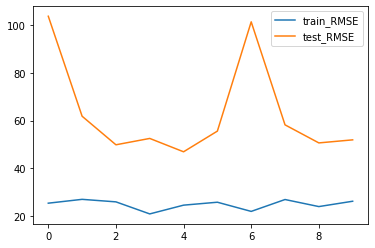

In [97]:
plt.plot(res_dict['train_score_RMSE'][40:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][40:], label='test_RMSE')
plt.legend()
plt.show()

## look_back=2

93/93 - 2s - loss: 0.0042
93/93 - 0s - loss: 0.0084
93/93 - 0s - loss: 0.0057
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0029
93/93 - 0s - loss: 0.0028
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0024
93/93 - 0s - loss: 0.0023
93/93 - 0s - loss: 0.0022
93/93 - 0s - loss: 0.0022
93/93 - 0s - loss: 0.0021
93/93 - 0s - loss: 0.0021
93/93 - 0s -

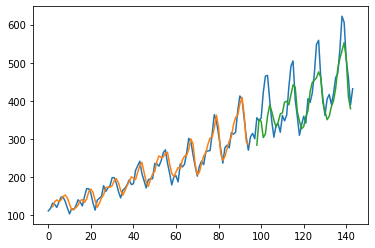

93/93 - 2s - loss: 0.0492
93/93 - 0s - loss: 0.0420
93/93 - 0s - loss: 0.0323
93/93 - 0s - loss: 0.0272
93/93 - 0s - loss: 0.0236
93/93 - 0s - loss: 0.0206
93/93 - 0s - loss: 0.0178
93/93 - 0s - loss: 0.0148
93/93 - 0s - loss: 0.0116
93/93 - 0s - loss: 0.0082
93/93 - 0s - loss: 0.0057
93/93 - 0s - loss: 0.0052
93/93 - 0s - loss: 0.0052
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0049
93/93 - 0s - loss: 0.0048
93/93 - 0s - loss: 0.0047
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s -

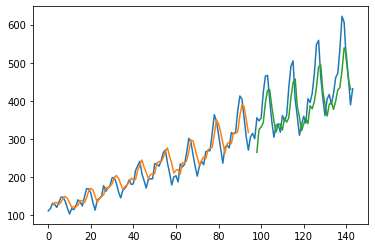

93/93 - 2s - loss: 0.0037
93/93 - 0s - loss: 0.0065
93/93 - 0s - loss: 0.0049
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0029
93/93 - 0s - loss: 0.0028
93/93 - 0s - loss: 0.0028
93/93 - 0s - loss: 0.0027
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0024
93/93 - 0s - loss: 0.0024
93/93 - 0s - loss: 0.0023
93/93 - 0s - loss: 0.0023
93/93 - 0s - loss: 0.0022
93/93 - 0s - loss: 0.0022
93/93 - 0s - loss: 0.0022
93/93 - 0s - loss: 0.0021
93/93 - 0s - loss: 0.0021
93/93 - 0s - loss: 0.0020
93/93 - 0s - loss: 0.0020
93/93 - 0s - loss: 0.0020
93/93 - 0s - loss: 0.0020
93/93 - 0s - loss: 0.0019
93/93 - 0s - loss: 0.0019
93/93 - 0s -

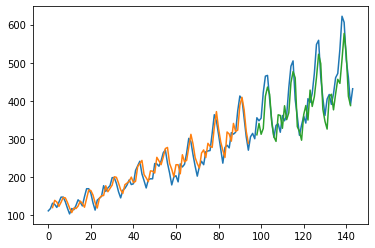

93/93 - 2s - loss: 0.0076
93/93 - 0s - loss: 0.0146
93/93 - 0s - loss: 0.0102
93/93 - 0s - loss: 0.0070
93/93 - 0s - loss: 0.0052
93/93 - 0s - loss: 0.0047
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s -

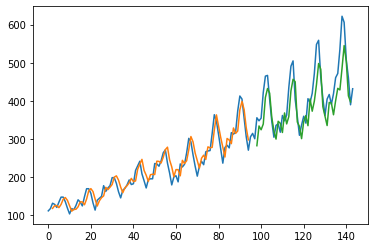

93/93 - 2s - loss: 0.0038
93/93 - 0s - loss: 0.0066
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s -

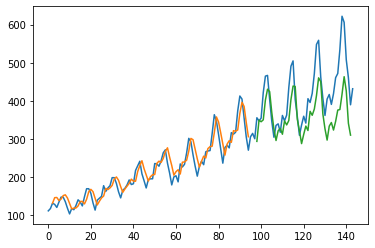

93/93 - 2s - loss: 0.0198
93/93 - 0s - loss: 0.0395
93/93 - 0s - loss: 0.0216
93/93 - 0s - loss: 0.0165
93/93 - 0s - loss: 0.0121
93/93 - 0s - loss: 0.0086
93/93 - 0s - loss: 0.0063
93/93 - 0s - loss: 0.0053
93/93 - 0s - loss: 0.0052
93/93 - 0s - loss: 0.0052
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0050
93/93 - 0s - loss: 0.0049
93/93 - 0s - loss: 0.0049
93/93 - 0s - loss: 0.0048
93/93 - 0s - loss: 0.0048
93/93 - 0s - loss: 0.0047
93/93 - 0s - loss: 0.0047
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s -

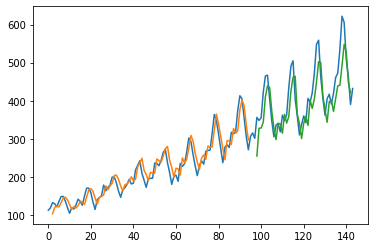

93/93 - 2s - loss: 0.0040
93/93 - 0s - loss: 0.0076
93/93 - 0s - loss: 0.0053
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0034
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0033
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0032
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0031
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0030
93/93 - 0s - loss: 0.0029
93/93 - 0s - loss: 0.0029
93/93 - 0s - loss: 0.0029
93/93 - 0s - loss: 0.0028
93/93 - 0s - loss: 0.0028
93/93 - 0s - loss: 0.0027
93/93 - 0s - loss: 0.0027
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0026
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0025
93/93 - 0s - loss: 0.0024
93/93 - 0s - loss: 0.0024
93/93 - 0s - loss: 0.0023
93/93 - 0s - loss: 0.0023
93/93 - 0s - loss: 0.0022
93/93 - 0s -

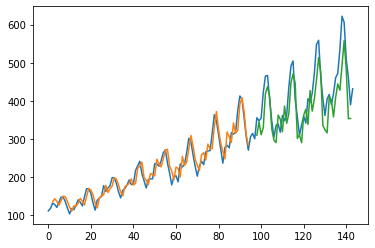

93/93 - 2s - loss: 0.0041
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0047
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s - loss: 0.0035
93/93 - 0s -

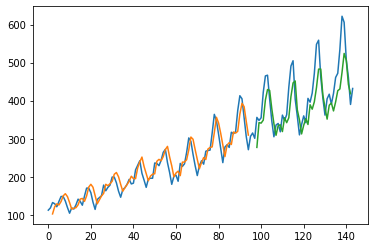

93/93 - 2s - loss: 0.0248
93/93 - 0s - loss: 0.0266
93/93 - 0s - loss: 0.0203
93/93 - 0s - loss: 0.0174
93/93 - 0s - loss: 0.0152
93/93 - 0s - loss: 0.0132
93/93 - 0s - loss: 0.0113
93/93 - 0s - loss: 0.0096
93/93 - 0s - loss: 0.0080
93/93 - 0s - loss: 0.0066
93/93 - 0s - loss: 0.0056
93/93 - 0s - loss: 0.0049
93/93 - 0s - loss: 0.0046
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0036
93/93 - 0s - loss: 0.0035
93/93 - 0s -

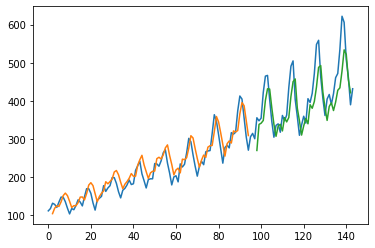

93/93 - 2s - loss: 0.0091
93/93 - 0s - loss: 0.0147
93/93 - 0s - loss: 0.0090
93/93 - 0s - loss: 0.0064
93/93 - 0s - loss: 0.0051
93/93 - 0s - loss: 0.0045
93/93 - 0s - loss: 0.0044
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0043
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0042
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0041
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0040
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0039
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0038
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s - loss: 0.0037
93/93 - 0s -

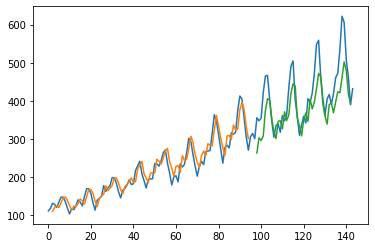

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
5   <keras.engine.sequential.Sequential object at ...  ...       57.342979
6   <keras.engine.sequential.Sequential object at ...  ...       51.553790
7   <keras.engine.sequential.Sequential object at ...  ...       47.917653
8   <keras.engine.sequential.Sequential object at ...  ...       51.156600
9   <keras.engine.sequential.Sequential object at ...  ...       45.922960
10  <keras.engine.sequential.Sequential object at ...  ...       80.730726
11  <keras.engine.sequential.Sequential object at ...  ...      211.646789
12  <keras.engine.sequential.Sequential object at ...  ...       65.009295
13  <keras.engine.sequential.Sequential object at ...  ...       66.659187
14  <keras.engine.sequential.Sequential object at ...  ...      108.133024
15  <keras.engine.sequential.Sequential object at ...  ...       69.576344
16  <keras.engine.sequential.Sequential object at ...  ...       73.232626
17  <keras.engine.sequential.Sequential object at ...  ...       75.383544
18  <keras.engine.sequential.Sequential object at ...  ...       93.500418
19  <keras.engine.sequential.Sequential object at ...  ...       61.962917
20  <keras.engine.sequential.Sequential object at ...  ...       61.239471
21  <keras.engine.sequential.Sequential object at ...  ...       63.767182
22  <keras.engine.sequential.Sequential object at ...  ...       71.156313
23  <keras.engine.sequential.Sequential object at ...  ...       64.400527
24  <keras.engine.sequential.Sequential object at ...  ...       64.352614
25  <keras.engine.sequential.Sequential object at ...  ...       65.453276
26  <keras.engine.sequential.Sequential object at ...  ...       54.690304
27  <keras.engine.sequential.Sequential object at ...  ...       55.459819
28  <keras.engine.sequential.Sequential object at ...  ...       75.098429
29  <keras.engine.sequential.Sequential object at ...  ...       82.009961
30  <keras.engine.sequential.Sequential object at ...  ...       73.114349
31  <keras.engine.sequential.Sequential object at ...  ...       60.519637
32  <keras.engine.sequential.Sequential object at ...  ...       60.992141
33  <keras.engine.sequential.Sequential object at ...  ...       49.486278
34  <keras.engine.sequential.Sequential object at ...  ...       82.317072
35  <keras.engine.sequential.Sequential object at ...  ...       58.839090
36  <keras.engine.sequential.Sequential object at ...  ...       59.809234
37  <keras.engine.sequential.Sequential object at ...  ...       78.614971
38  <keras.engine.sequential.Sequential object at ...  ...       52.636963
39  <keras.engine.sequential.Sequential object at ...  ...       56.044701
40  <keras.engine.sequential.Sequential object at ...  ...      103.889120
41  <keras.engine.sequential.Sequential object at ...  ...       61.854692
42  <keras.engine.sequential.Sequential object at ...  ...       49.847159
43  <keras.engine.sequential.Sequential object at ...  ...       52.520484
44  <keras.engine.sequential.Sequential object at ...  ...       46.907184
45  <keras.engine.sequential.Sequential object at ...  ...       55.603260
46  <keras.engine.sequential.Sequential object at ...  ...      101.540919
47  <keras.engine.sequential.Sequential object at ...  ...       58.233479
48  <keras.engine.sequential.Sequential object at ...  ...       50.639072
49  <keras.engine.sequential.Sequential object at ...  ...       51.923815
50  <keras.engine.sequential.Sequential object at ...  ...       51.009673
51  <keras.engine.sequential.Sequential object at ...  ...       53.496577
52  <keras.engine.sequential.Sequential object at ...  ...       45.5708

In [98]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=2,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [101]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[50:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          2.0          1.0     1.0         22.207116        54.737137
std           0.0          0.0     0.0          2.447428         8.362544
min           2.0          1.0     1.0         17.583878        45.570803
25%           2.0          1.0     1.0         21.185410        51.043652
50%           2.0          1.0     1.0         22.013286        53.128789
75%           2.0          1.0     1.0         24.000645        53.622535
max           2.0          1.0     1.0         26.023812        76.418324

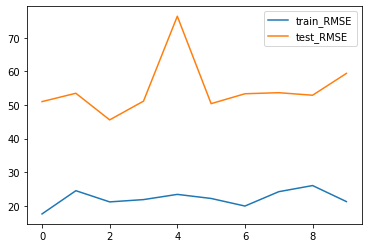

In [102]:
plt.plot(res_dict['train_score_RMSE'][50:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][50:], label='test_RMSE')
plt.legend()
plt.show()

## look_back=1

94/94 - 2s - loss: 0.0038
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0028
94/94 - 0s - loss: 0.0028
94/94 - 0s - loss: 0.0028
94/94 - 0s - loss: 0.0028
94/94 - 0s -

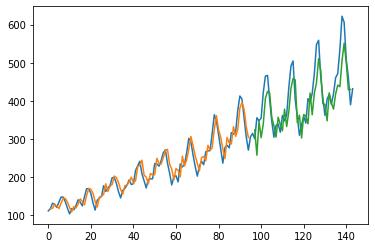

94/94 - 2s - loss: 0.0050
94/94 - 0s - loss: 0.0114
94/94 - 0s - loss: 0.0082
94/94 - 0s - loss: 0.0050
94/94 - 0s - loss: 0.0047
94/94 - 0s - loss: 0.0052
94/94 - 0s - loss: 0.0049
94/94 - 0s - loss: 0.0046
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s -

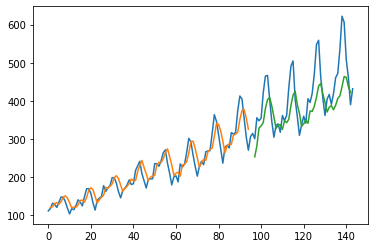

94/94 - 2s - loss: 0.0113
94/94 - 0s - loss: 0.0202
94/94 - 0s - loss: 0.0117
94/94 - 0s - loss: 0.0081
94/94 - 0s - loss: 0.0057
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s -

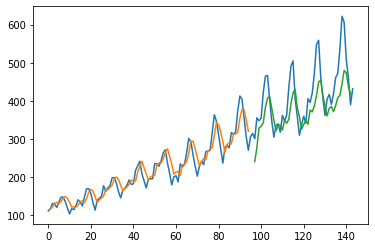

94/94 - 3s - loss: 0.0047
94/94 - 0s - loss: 0.0074
94/94 - 0s - loss: 0.0050
94/94 - 0s - loss: 0.0046
94/94 - 0s - loss: 0.0049
94/94 - 0s - loss: 0.0048
94/94 - 0s - loss: 0.0047
94/94 - 0s - loss: 0.0045
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s -

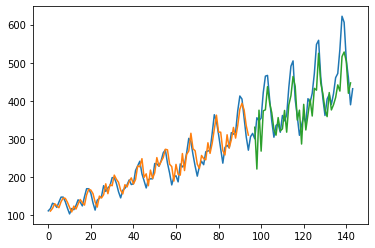

94/94 - 2s - loss: 0.0069
94/94 - 0s - loss: 0.0325
94/94 - 0s - loss: 0.0193
94/94 - 0s - loss: 0.0144
94/94 - 0s - loss: 0.0110
94/94 - 0s - loss: 0.0085
94/94 - 0s - loss: 0.0066
94/94 - 0s - loss: 0.0052
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0029
94/94 - 0s - loss: 0.0028
94/94 - 0s -

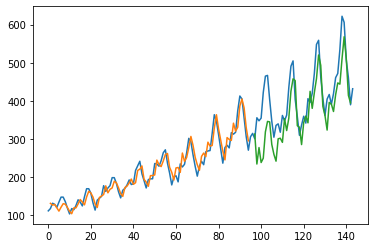

94/94 - 2s - loss: 0.0182
94/94 - 0s - loss: 0.0149
94/94 - 0s - loss: 0.0128
94/94 - 0s - loss: 0.0108
94/94 - 0s - loss: 0.0089
94/94 - 0s - loss: 0.0073
94/94 - 0s - loss: 0.0059
94/94 - 0s - loss: 0.0049
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s -

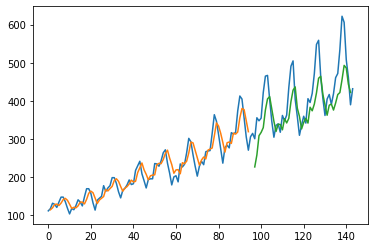

94/94 - 2s - loss: 0.0063
94/94 - 0s - loss: 0.0153
94/94 - 0s - loss: 0.0083
94/94 - 0s - loss: 0.0052
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s - loss: 0.0030
94/94 - 0s -

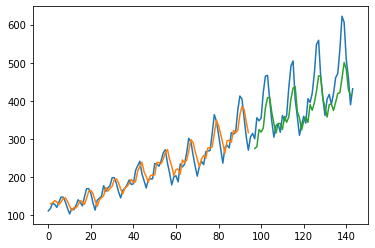

94/94 - 2s - loss: 0.0042
94/94 - 0s - loss: 0.0052
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s -

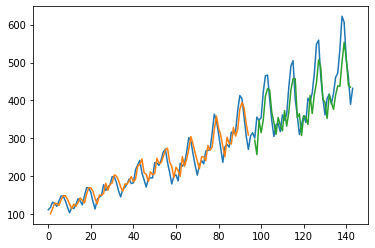

94/94 - 2s - loss: 0.0071
94/94 - 0s - loss: 0.0281
94/94 - 0s - loss: 0.0158
94/94 - 0s - loss: 0.0097
94/94 - 0s - loss: 0.0058
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0046
94/94 - 0s - loss: 0.0046
94/94 - 0s - loss: 0.0044
94/94 - 0s - loss: 0.0042
94/94 - 0s - loss: 0.0041
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0033
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0032
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s - loss: 0.0031
94/94 - 0s -

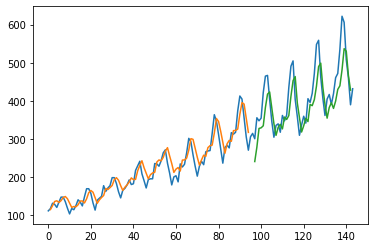

94/94 - 2s - loss: 0.0172
94/94 - 0s - loss: 0.0116
94/94 - 0s - loss: 0.0109
94/94 - 0s - loss: 0.0094
94/94 - 0s - loss: 0.0079
94/94 - 0s - loss: 0.0067
94/94 - 0s - loss: 0.0057
94/94 - 0s - loss: 0.0049
94/94 - 0s - loss: 0.0043
94/94 - 0s - loss: 0.0040
94/94 - 0s - loss: 0.0039
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0038
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0037
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0036
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0035
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0034
94/94 - 0s - loss: 0.0033
94/94 - 0s -

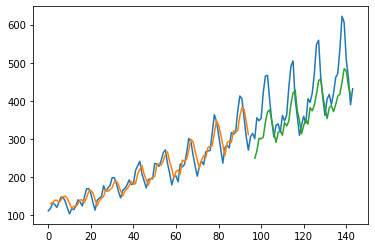

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
..                                                ...  ...             ...
65  <keras.engine.sequential.Sequential object at ...  ...       61.750731
66  <keras.engine.sequential.Sequential object at ...  ...       57.933865
67  <keras.engine.sequential.Sequential object at ...  ...       48.596526
68  <keras.engine.sequential.Sequential object at ...  ...       53.275569
69  <keras.engine.sequential.Sequential object at ...  ...       66.786780

[70 rows x 8 columns]

In [103]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=1,
                         batch_size=1,
                         epochs=1,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [104]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[60:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          1.0          1.0     1.0         22.331010        58.484335
std           0.0          0.0     0.0          2.036331         7.241143
min           1.0          1.0     1.0         19.039087        48.596526
25%           1.0          1.0     1.0         20.756570        52.724060
50%           1.0          1.0     1.0         22.220451        59.842298
75%           1.0          1.0     1.0         24.061829        65.195686
max           1.0          1.0     1.0         25.147546        66.786780

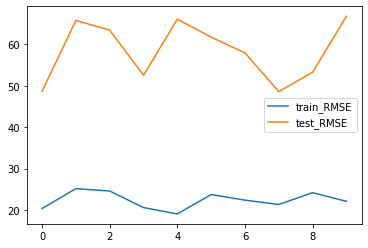

In [105]:
plt.plot(res_dict['train_score_RMSE'][60:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][60:], label='test_RMSE')
plt.legend()
plt.show()

## look_back=2, epochs=2

Epoch 1/2
93/93 - 2s - loss: 0.0046
Epoch 2/2
93/93 - 0s - loss: 0.0075
Epoch 1/2
93/93 - 0s - loss: 0.0048
Epoch 2/2
93/93 - 0s - loss: 0.0055
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0049
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0047
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss: 0.0045
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0044
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0042
Epoch 1/2
93/93 - 0s - loss: 0.0034
Epoch 2/2
93/93 - 0s - loss: 0.0041
Epoch 1/2
93/93 - 0s - loss: 0.0033
Epoch 2/2
93/93 - 0s - loss: 0.0040
Epoch 1/2
93/93 - 0s - loss: 0.0033
Epoch 2/2
93/93 - 0s - loss: 0.0038
Epoch 1/2
93/93 - 0s - loss: 0.0032
Epoch 2/2
93/93 - 0s - loss: 0.0037
Epoch 1/2
93/93 - 0s - loss: 0.0031
Epoch 2/2
93/93 - 0s - loss: 0.0036
Epoch 1/2
93/93 - 0s - loss: 0.0031
Epoch 2/2
93/93 - 0s - loss: 0.0035
Epoch 1/2
93/93 - 0s - loss: 0.0030
Epoch 2/2
93/93 - 0s - loss:

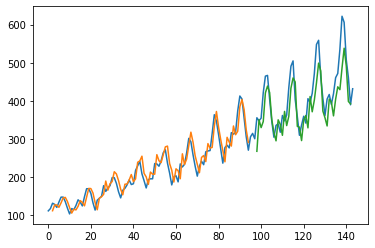

Epoch 1/2
93/93 - 2s - loss: 0.0046
Epoch 2/2
93/93 - 0s - loss: 0.0112
Epoch 1/2
93/93 - 0s - loss: 0.0076
Epoch 2/2
93/93 - 0s - loss: 0.0079
Epoch 1/2
93/93 - 0s - loss: 0.0055
Epoch 2/2
93/93 - 0s - loss: 0.0066
Epoch 1/2
93/93 - 0s - loss: 0.0047
Epoch 2/2
93/93 - 0s - loss: 0.0060
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0056
Epoch 1/2
93/93 - 0s - loss: 0.0043
Epoch 2/2
93/93 - 0s - loss: 0.0052
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0048
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0045
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0041
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0038
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0037
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0035
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0034
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss:

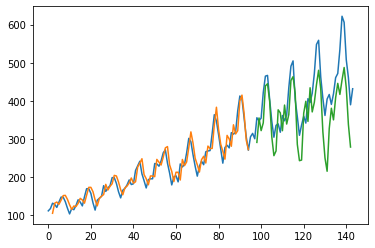

Epoch 1/2
93/93 - 2s - loss: 0.0066
Epoch 2/2
93/93 - 0s - loss: 0.0189
Epoch 1/2
93/93 - 0s - loss: 0.0098
Epoch 2/2
93/93 - 0s - loss: 0.0108
Epoch 1/2
93/93 - 0s - loss: 0.0058
Epoch 2/2
93/93 - 0s - loss: 0.0088
Epoch 1/2
93/93 - 0s - loss: 0.0047
Epoch 2/2
93/93 - 0s - loss: 0.0080
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0074
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0070
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0066
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0063
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0060
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0058
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0055
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0053
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0050
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss:

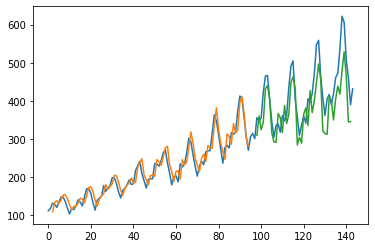

Epoch 1/2
93/93 - 2s - loss: 0.0150
Epoch 2/2
93/93 - 0s - loss: 0.0424
Epoch 1/2
93/93 - 0s - loss: 0.0227
Epoch 2/2
93/93 - 0s - loss: 0.0201
Epoch 1/2
93/93 - 0s - loss: 0.0153
Epoch 2/2
93/93 - 0s - loss: 0.0142
Epoch 1/2
93/93 - 0s - loss: 0.0102
Epoch 2/2
93/93 - 0s - loss: 0.0104
Epoch 1/2
93/93 - 0s - loss: 0.0069
Epoch 2/2
93/93 - 0s - loss: 0.0085
Epoch 1/2
93/93 - 0s - loss: 0.0055
Epoch 2/2
93/93 - 0s - loss: 0.0077
Epoch 1/2
93/93 - 0s - loss: 0.0050
Epoch 2/2
93/93 - 0s - loss: 0.0072
Epoch 1/2
93/93 - 0s - loss: 0.0048
Epoch 2/2
93/93 - 0s - loss: 0.0068
Epoch 1/2
93/93 - 0s - loss: 0.0047
Epoch 2/2
93/93 - 0s - loss: 0.0065
Epoch 1/2
93/93 - 0s - loss: 0.0046
Epoch 2/2
93/93 - 0s - loss: 0.0062
Epoch 1/2
93/93 - 0s - loss: 0.0045
Epoch 2/2
93/93 - 0s - loss: 0.0060
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0058
Epoch 1/2
93/93 - 0s - loss: 0.0043
Epoch 2/2
93/93 - 0s - loss: 0.0056
Epoch 1/2
93/93 - 0s - loss: 0.0043
Epoch 2/2
93/93 - 0s - loss:

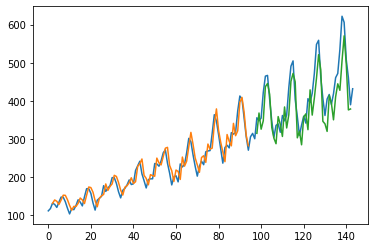

Epoch 1/2
93/93 - 4s - loss: 0.0209
Epoch 2/2
93/93 - 0s - loss: 0.0347
Epoch 1/2
93/93 - 0s - loss: 0.0194
Epoch 2/2
93/93 - 0s - loss: 0.0163
Epoch 1/2
93/93 - 0s - loss: 0.0101
Epoch 2/2
93/93 - 0s - loss: 0.0099
Epoch 1/2
93/93 - 0s - loss: 0.0060
Epoch 2/2
93/93 - 0s - loss: 0.0080
Epoch 1/2
93/93 - 0s - loss: 0.0052
Epoch 2/2
93/93 - 0s - loss: 0.0073
Epoch 1/2
93/93 - 0s - loss: 0.0049
Epoch 2/2
93/93 - 0s - loss: 0.0068
Epoch 1/2
93/93 - 0s - loss: 0.0047
Epoch 2/2
93/93 - 0s - loss: 0.0064
Epoch 1/2
93/93 - 0s - loss: 0.0046
Epoch 2/2
93/93 - 0s - loss: 0.0060
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0057
Epoch 1/2
93/93 - 0s - loss: 0.0043
Epoch 2/2
93/93 - 0s - loss: 0.0055
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0052
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0051
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0049
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss:

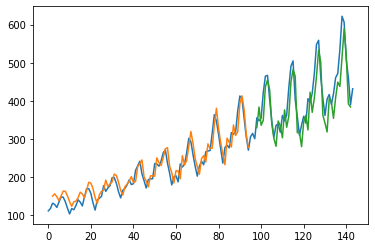

Epoch 1/2
93/93 - 2s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0076
Epoch 1/2
93/93 - 0s - loss: 0.0051
Epoch 2/2
93/93 - 0s - loss: 0.0059
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0054
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0051
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0049
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0047
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0045
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0044
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0042
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss: 0.0041
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0039
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0038
Epoch 1/2
93/93 - 0s - loss: 0.0034
Epoch 2/2
93/93 - 0s - loss: 0.0037
Epoch 1/2
93/93 - 0s - loss: 0.0033
Epoch 2/2
93/93 - 0s - loss:

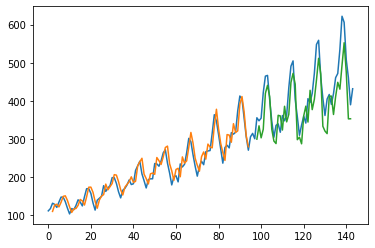

Epoch 1/2
93/93 - 2s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0117
Epoch 1/2
93/93 - 0s - loss: 0.0064
Epoch 2/2
93/93 - 0s - loss: 0.0082
Epoch 1/2
93/93 - 0s - loss: 0.0049
Epoch 2/2
93/93 - 0s - loss: 0.0071
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0064
Epoch 1/2
93/93 - 0s - loss: 0.0043
Epoch 2/2
93/93 - 0s - loss: 0.0059
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0056
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0052
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0050
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0047
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0046
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0044
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0042
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0041
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss:

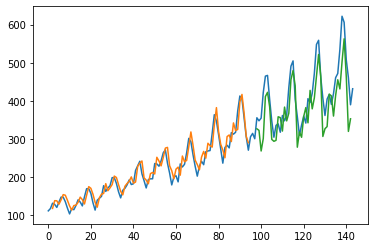

Epoch 1/2
93/93 - 2s - loss: 0.0061
Epoch 2/2
93/93 - 0s - loss: 0.0119
Epoch 1/2
93/93 - 0s - loss: 0.0074
Epoch 2/2
93/93 - 0s - loss: 0.0079
Epoch 1/2
93/93 - 0s - loss: 0.0052
Epoch 2/2
93/93 - 0s - loss: 0.0067
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0062
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0059
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0057
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0054
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0052
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0050
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0048
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0047
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss: 0.0045
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0043
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss:

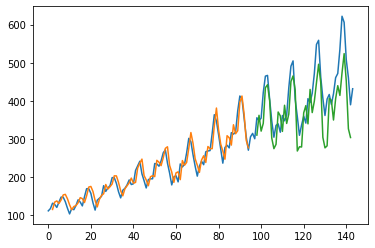

Epoch 1/2
93/93 - 2s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0081
Epoch 1/2
93/93 - 0s - loss: 0.0046
Epoch 2/2
93/93 - 0s - loss: 0.0070
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0065
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0061
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0057
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss: 0.0054
Epoch 1/2
93/93 - 0s - loss: 0.0038
Epoch 2/2
93/93 - 0s - loss: 0.0051
Epoch 1/2
93/93 - 0s - loss: 0.0037
Epoch 2/2
93/93 - 0s - loss: 0.0049
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss: 0.0047
Epoch 1/2
93/93 - 0s - loss: 0.0036
Epoch 2/2
93/93 - 0s - loss: 0.0045
Epoch 1/2
93/93 - 0s - loss: 0.0035
Epoch 2/2
93/93 - 0s - loss: 0.0043
Epoch 1/2
93/93 - 0s - loss: 0.0034
Epoch 2/2
93/93 - 0s - loss: 0.0041
Epoch 1/2
93/93 - 0s - loss: 0.0033
Epoch 2/2
93/93 - 0s - loss: 0.0039
Epoch 1/2
93/93 - 0s - loss: 0.0032
Epoch 2/2
93/93 - 0s - loss:

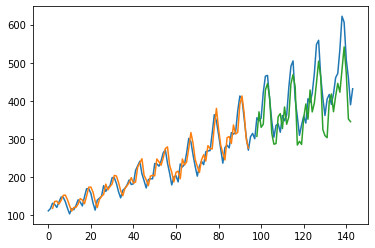

Epoch 1/2
93/93 - 2s - loss: 0.0245
Epoch 2/2
93/93 - 0s - loss: 0.0378
Epoch 1/2
93/93 - 0s - loss: 0.0253
Epoch 2/2
93/93 - 0s - loss: 0.0219
Epoch 1/2
93/93 - 0s - loss: 0.0178
Epoch 2/2
93/93 - 0s - loss: 0.0162
Epoch 1/2
93/93 - 0s - loss: 0.0130
Epoch 2/2
93/93 - 0s - loss: 0.0122
Epoch 1/2
93/93 - 0s - loss: 0.0094
Epoch 2/2
93/93 - 0s - loss: 0.0093
Epoch 1/2
93/93 - 0s - loss: 0.0069
Epoch 2/2
93/93 - 0s - loss: 0.0075
Epoch 1/2
93/93 - 0s - loss: 0.0055
Epoch 2/2
93/93 - 0s - loss: 0.0065
Epoch 1/2
93/93 - 0s - loss: 0.0049
Epoch 2/2
93/93 - 0s - loss: 0.0061
Epoch 1/2
93/93 - 0s - loss: 0.0045
Epoch 2/2
93/93 - 0s - loss: 0.0058
Epoch 1/2
93/93 - 0s - loss: 0.0044
Epoch 2/2
93/93 - 0s - loss: 0.0056
Epoch 1/2
93/93 - 0s - loss: 0.0042
Epoch 2/2
93/93 - 0s - loss: 0.0054
Epoch 1/2
93/93 - 0s - loss: 0.0041
Epoch 2/2
93/93 - 0s - loss: 0.0052
Epoch 1/2
93/93 - 0s - loss: 0.0040
Epoch 2/2
93/93 - 0s - loss: 0.0050
Epoch 1/2
93/93 - 0s - loss: 0.0039
Epoch 2/2
93/93 - 0s - loss:

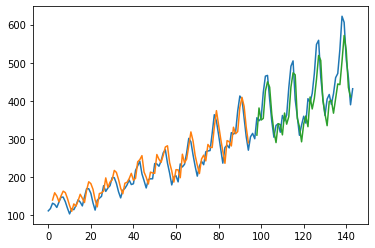

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
..                                                ...  ...             ...
75  <keras.engine.sequential.Sequential object at ...  ...       54.138849
76  <keras.engine.sequential.Sequential object at ...  ...       57.063155
77  <keras.engine.sequential.Sequential object at ...  ...       64.552588
78  <keras.engine.sequential.Sequential object at ...  ...       56.803781
79  <keras.engine.sequential.Sequential object at ...  ...       45.872586

[80 rows x 8 columns]

In [106]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=2,
                         batch_size=1,
                         epochs=2,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [113]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[70:80].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          2.0          1.0     2.0         20.945796        56.027273
std           0.0          0.0     0.0          1.052332         8.556576
min           2.0          1.0     2.0         19.841796        45.872586
25%           2.0          1.0     2.0         20.273172        50.439620
50%           2.0          1.0     2.0         20.513329        55.471315
75%           2.0          1.0     2.0         21.519351        57.747867
max           2.0          1.0     2.0         23.245153        74.665251

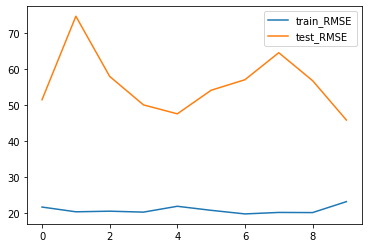

In [114]:
plt.plot(res_dict['train_score_RMSE'][70:80], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][70:80], label='test_RMSE')
plt.legend()
plt.show()

## look_back=3, epochs=2

Epoch 1/2
92/92 - 2s - loss: 0.0070
Epoch 2/2
92/92 - 0s - loss: 0.0158
Epoch 1/2
92/92 - 0s - loss: 0.0085
Epoch 2/2
92/92 - 0s - loss: 0.0089
Epoch 1/2
92/92 - 0s - loss: 0.0062
Epoch 2/2
92/92 - 0s - loss: 0.0077
Epoch 1/2
92/92 - 0s - loss: 0.0057
Epoch 2/2
92/92 - 0s - loss: 0.0073
Epoch 1/2
92/92 - 0s - loss: 0.0055
Epoch 2/2
92/92 - 0s - loss: 0.0070
Epoch 1/2
92/92 - 0s - loss: 0.0054
Epoch 2/2
92/92 - 0s - loss: 0.0067
Epoch 1/2
92/92 - 0s - loss: 0.0053
Epoch 2/2
92/92 - 0s - loss: 0.0065
Epoch 1/2
92/92 - 0s - loss: 0.0052
Epoch 2/2
92/92 - 0s - loss: 0.0062
Epoch 1/2
92/92 - 0s - loss: 0.0051
Epoch 2/2
92/92 - 0s - loss: 0.0060
Epoch 1/2
92/92 - 0s - loss: 0.0050
Epoch 2/2
92/92 - 0s - loss: 0.0058
Epoch 1/2
92/92 - 0s - loss: 0.0049
Epoch 2/2
92/92 - 0s - loss: 0.0057
Epoch 1/2
92/92 - 0s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0055
Epoch 1/2
92/92 - 0s - loss: 0.0047
Epoch 2/2
92/92 - 0s - loss: 0.0053
Epoch 1/2
92/92 - 0s - loss: 0.0046
Epoch 2/2
92/92 - 0s - loss:

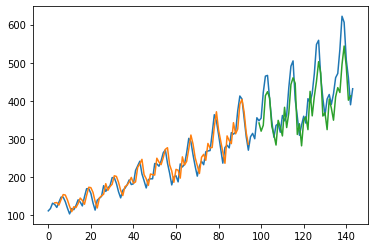

Epoch 1/2
92/92 - 2s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0050
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0042
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0041
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0040
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0039
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0038
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0037
Epoch 1/2
92/92 - 0s - loss: 0.0035
Epoch 2/2
92/92 - 0s - loss: 0.0036
Epoch 1/2
92/92 - 0s - loss: 0.0034
Epoch 2/2
92/92 - 0s - loss: 0.0035
Epoch 1/2
92/92 - 0s - loss: 0.0034
Epoch 2/2
92/92 - 0s - loss: 0.0035
Epoch 1/2
92/92 - 0s - loss: 0.0033
Epoch 2/2
92/92 - 0s - loss: 0.0034
Epoch 1/2
92/92 - 0s - loss: 0.0032
Epoch 2/2
92/92 - 0s - loss:

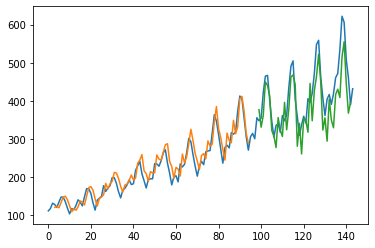

Epoch 1/2
92/92 - 2s - loss: 0.0211
Epoch 2/2
92/92 - 0s - loss: 0.0150
Epoch 1/2
92/92 - 0s - loss: 0.0123
Epoch 2/2
92/92 - 0s - loss: 0.0113
Epoch 1/2
92/92 - 0s - loss: 0.0083
Epoch 2/2
92/92 - 0s - loss: 0.0083
Epoch 1/2
92/92 - 0s - loss: 0.0061
Epoch 2/2
92/92 - 0s - loss: 0.0067
Epoch 1/2
92/92 - 0s - loss: 0.0051
Epoch 2/2
92/92 - 0s - loss: 0.0060
Epoch 1/2
92/92 - 0s - loss: 0.0047
Epoch 2/2
92/92 - 0s - loss: 0.0056
Epoch 1/2
92/92 - 0s - loss: 0.0045
Epoch 2/2
92/92 - 0s - loss: 0.0053
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0050
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0048
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0044
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0041
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss:

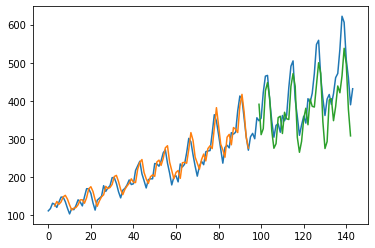

Epoch 1/2
92/92 - 2s - loss: 0.0049
Epoch 2/2
92/92 - 0s - loss: 0.0117
Epoch 1/2
92/92 - 0s - loss: 0.0073
Epoch 2/2
92/92 - 0s - loss: 0.0080
Epoch 1/2
92/92 - 0s - loss: 0.0055
Epoch 2/2
92/92 - 0s - loss: 0.0070
Epoch 1/2
92/92 - 0s - loss: 0.0050
Epoch 2/2
92/92 - 0s - loss: 0.0066
Epoch 1/2
92/92 - 0s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0063
Epoch 1/2
92/92 - 0s - loss: 0.0047
Epoch 2/2
92/92 - 0s - loss: 0.0060
Epoch 1/2
92/92 - 0s - loss: 0.0046
Epoch 2/2
92/92 - 0s - loss: 0.0058
Epoch 1/2
92/92 - 0s - loss: 0.0045
Epoch 2/2
92/92 - 0s - loss: 0.0056
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0053
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0051
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0049
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0047
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss:

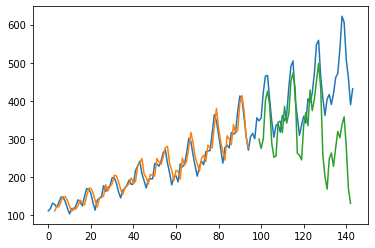

Epoch 1/2
92/92 - 2s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0078
Epoch 1/2
92/92 - 0s - loss: 0.0057
Epoch 2/2
92/92 - 0s - loss: 0.0056
Epoch 1/2
92/92 - 0s - loss: 0.0046
Epoch 2/2
92/92 - 0s - loss: 0.0051
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0049
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0048
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0045
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0045
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0044
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0042
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0041
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0040
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss:

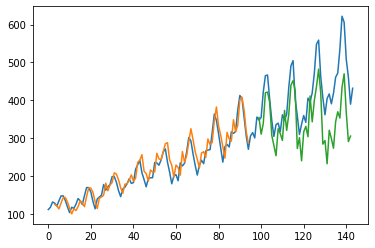

Epoch 1/2
92/92 - 2s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0044
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0042
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0040
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0039
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0038
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0037
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0036
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0035
Epoch 1/2
92/92 - 0s - loss: 0.0035
Epoch 2/2
92/92 - 0s - loss: 0.0035
Epoch 1/2
92/92 - 0s - loss: 0.0034
Epoch 2/2
92/92 - 0s - loss: 0.0034
Epoch 1/2
92/92 - 0s - loss: 0.0034
Epoch 2/2
92/92 - 0s - loss: 0.0033
Epoch 1/2
92/92 - 0s - loss: 0.0033
Epoch 2/2
92/92 - 0s - loss: 0.0033
Epoch 1/2
92/92 - 0s - loss: 0.0033
Epoch 2/2
92/92 - 0s - loss:

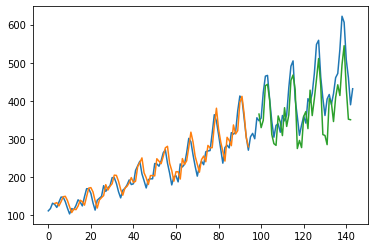

Epoch 1/2
92/92 - 4s - loss: 0.0086
Epoch 2/2
92/92 - 0s - loss: 0.0171
Epoch 1/2
92/92 - 0s - loss: 0.0112
Epoch 2/2
92/92 - 0s - loss: 0.0100
Epoch 1/2
92/92 - 0s - loss: 0.0076
Epoch 2/2
92/92 - 0s - loss: 0.0074
Epoch 1/2
92/92 - 0s - loss: 0.0056
Epoch 2/2
92/92 - 0s - loss: 0.0061
Epoch 1/2
92/92 - 0s - loss: 0.0047
Epoch 2/2
92/92 - 0s - loss: 0.0056
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0054
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0052
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0050
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0048
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0045
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0035
Epoch 2/2
92/92 - 0s - loss: 0.0042
Epoch 1/2
92/92 - 0s - loss: 0.0034
Epoch 2/2
92/92 - 0s - loss:

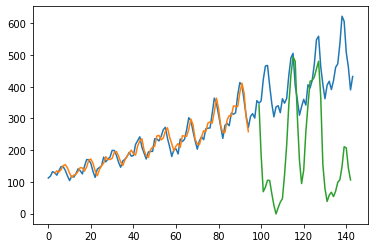

Epoch 1/2
92/92 - 2s - loss: 0.0051
Epoch 2/2
92/92 - 0s - loss: 0.0138
Epoch 1/2
92/92 - 0s - loss: 0.0078
Epoch 2/2
92/92 - 0s - loss: 0.0077
Epoch 1/2
92/92 - 0s - loss: 0.0054
Epoch 2/2
92/92 - 0s - loss: 0.0065
Epoch 1/2
92/92 - 0s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0061
Epoch 1/2
92/92 - 0s - loss: 0.0046
Epoch 2/2
92/92 - 0s - loss: 0.0059
Epoch 1/2
92/92 - 0s - loss: 0.0045
Epoch 2/2
92/92 - 0s - loss: 0.0057
Epoch 1/2
92/92 - 0s - loss: 0.0045
Epoch 2/2
92/92 - 0s - loss: 0.0055
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0053
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0052
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0051
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0049
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0048
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0047
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss:

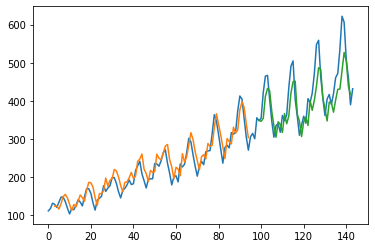

Epoch 1/2
92/92 - 2s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0147
Epoch 1/2
92/92 - 0s - loss: 0.0081
Epoch 2/2
92/92 - 0s - loss: 0.0087
Epoch 1/2
92/92 - 0s - loss: 0.0057
Epoch 2/2
92/92 - 0s - loss: 0.0073
Epoch 1/2
92/92 - 0s - loss: 0.0051
Epoch 2/2
92/92 - 0s - loss: 0.0068
Epoch 1/2
92/92 - 0s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0064
Epoch 1/2
92/92 - 0s - loss: 0.0047
Epoch 2/2
92/92 - 0s - loss: 0.0061
Epoch 1/2
92/92 - 0s - loss: 0.0046
Epoch 2/2
92/92 - 0s - loss: 0.0059
Epoch 1/2
92/92 - 0s - loss: 0.0045
Epoch 2/2
92/92 - 0s - loss: 0.0057
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0055
Epoch 1/2
92/92 - 0s - loss: 0.0044
Epoch 2/2
92/92 - 0s - loss: 0.0054
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0052
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0051
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0050
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss:

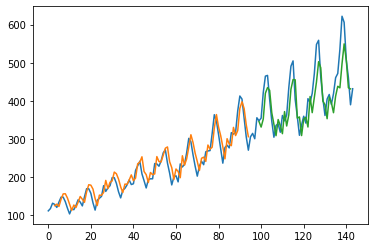

Epoch 1/2
92/92 - 2s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0065
Epoch 1/2
92/92 - 0s - loss: 0.0048
Epoch 2/2
92/92 - 0s - loss: 0.0055
Epoch 1/2
92/92 - 0s - loss: 0.0043
Epoch 2/2
92/92 - 0s - loss: 0.0052
Epoch 1/2
92/92 - 0s - loss: 0.0042
Epoch 2/2
92/92 - 0s - loss: 0.0049
Epoch 1/2
92/92 - 0s - loss: 0.0041
Epoch 2/2
92/92 - 0s - loss: 0.0048
Epoch 1/2
92/92 - 0s - loss: 0.0040
Epoch 2/2
92/92 - 0s - loss: 0.0046
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0045
Epoch 1/2
92/92 - 0s - loss: 0.0039
Epoch 2/2
92/92 - 0s - loss: 0.0043
Epoch 1/2
92/92 - 0s - loss: 0.0038
Epoch 2/2
92/92 - 0s - loss: 0.0042
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0041
Epoch 1/2
92/92 - 0s - loss: 0.0037
Epoch 2/2
92/92 - 0s - loss: 0.0040
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0039
Epoch 1/2
92/92 - 0s - loss: 0.0036
Epoch 2/2
92/92 - 0s - loss: 0.0038
Epoch 1/2
92/92 - 0s - loss: 0.0035
Epoch 2/2
92/92 - 0s - loss:

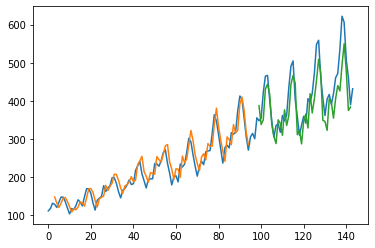

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
..                                                ...  ...             ...
85  <keras.engine.sequential.Sequential object at ...  ...       58.861323
86  <keras.engine.sequential.Sequential object at ...  ...      265.779799
87  <keras.engine.sequential.Sequential object at ...  ...       50.658362
88  <keras.engine.sequential.Sequential object at ...  ...       47.424676
89  <keras.engine.sequential.Sequential object at ...  ...       51.264411

[90 rows x 8 columns]

In [109]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=3,
                         batch_size=1,
                         epochs=2,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [115]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[80:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          3.0          1.0     2.0         21.669090        86.288316
std           0.0          0.0     0.0          1.653791        68.007023
min           3.0          1.0     2.0         18.799653        47.424676
25%           3.0          1.0     2.0         20.699567        51.495288
50%           3.0          1.0     2.0         21.634228        57.409488
75%           3.0          1.0     2.0         22.722395        82.602249
max           3.0          1.0     2.0         24.701731       265.779799

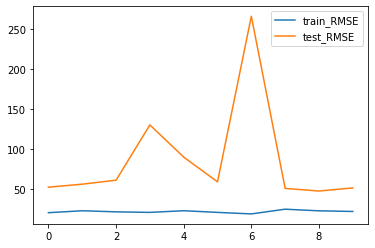

In [116]:
plt.plot(res_dict['train_score_RMSE'][80:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][80:], label='test_RMSE')
plt.legend()
plt.show()

## look_back=2, epochs=6

Epoch 1/6
93/93 - 2s - loss: 0.0080
Epoch 2/6
93/93 - 0s - loss: 0.0280
Epoch 3/6
93/93 - 0s - loss: 0.0165
Epoch 4/6
93/93 - 0s - loss: 0.0132
Epoch 5/6
93/93 - 0s - loss: 0.0113
Epoch 6/6
93/93 - 0s - loss: 0.0101
Epoch 1/6
93/93 - 0s - loss: 0.0053
Epoch 2/6
93/93 - 0s - loss: 0.0089
Epoch 3/6
93/93 - 0s - loss: 0.0083
Epoch 4/6
93/93 - 0s - loss: 0.0079
Epoch 5/6
93/93 - 0s - loss: 0.0075
Epoch 6/6
93/93 - 0s - loss: 0.0071
Epoch 1/6
93/93 - 0s - loss: 0.0043
Epoch 2/6
93/93 - 0s - loss: 0.0066
Epoch 3/6
93/93 - 0s - loss: 0.0064
Epoch 4/6
93/93 - 0s - loss: 0.0061
Epoch 5/6
93/93 - 0s - loss: 0.0059
Epoch 6/6
93/93 - 0s - loss: 0.0057
Epoch 1/6
93/93 - 0s - loss: 0.0039
Epoch 2/6
93/93 - 0s - loss: 0.0054
Epoch 3/6
93/93 - 0s - loss: 0.0052
Epoch 4/6
93/93 - 0s - loss: 0.0051
Epoch 5/6
93/93 - 0s - loss: 0.0049
Epoch 6/6
93/93 - 0s - loss: 0.0048
Epoch 1/6
93/93 - 0s - loss: 0.0036
Epoch 2/6
93/93 - 0s - loss: 0.0045
Epoch 3/6
93/93 - 0s - loss: 0.0044
Epoch 4/6
93/93 - 0s - loss:

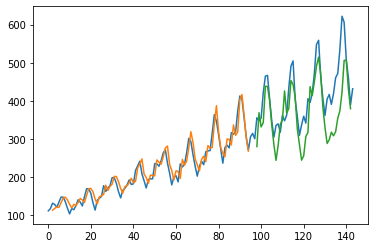

Epoch 1/6
93/93 - 2s - loss: 0.0062
Epoch 2/6
93/93 - 0s - loss: 0.0206
Epoch 3/6
93/93 - 0s - loss: 0.0131
Epoch 4/6
93/93 - 0s - loss: 0.0107
Epoch 5/6
93/93 - 0s - loss: 0.0094
Epoch 6/6
93/93 - 0s - loss: 0.0087
Epoch 1/6
93/93 - 0s - loss: 0.0050
Epoch 2/6
93/93 - 0s - loss: 0.0080
Epoch 3/6
93/93 - 0s - loss: 0.0077
Epoch 4/6
93/93 - 0s - loss: 0.0073
Epoch 5/6
93/93 - 0s - loss: 0.0071
Epoch 6/6
93/93 - 0s - loss: 0.0068
Epoch 1/6
93/93 - 0s - loss: 0.0044
Epoch 2/6
93/93 - 0s - loss: 0.0065
Epoch 3/6
93/93 - 0s - loss: 0.0063
Epoch 4/6
93/93 - 0s - loss: 0.0061
Epoch 5/6
93/93 - 0s - loss: 0.0060
Epoch 6/6
93/93 - 0s - loss: 0.0058
Epoch 1/6
93/93 - 0s - loss: 0.0042
Epoch 2/6
93/93 - 0s - loss: 0.0056
Epoch 3/6
93/93 - 0s - loss: 0.0054
Epoch 4/6
93/93 - 0s - loss: 0.0053
Epoch 5/6
93/93 - 0s - loss: 0.0052
Epoch 6/6
93/93 - 0s - loss: 0.0050
Epoch 1/6
93/93 - 0s - loss: 0.0039
Epoch 2/6
93/93 - 0s - loss: 0.0048
Epoch 3/6
93/93 - 0s - loss: 0.0047
Epoch 4/6
93/93 - 0s - loss:

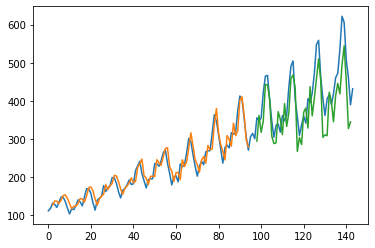

Epoch 1/6
93/93 - 2s - loss: 0.0066
Epoch 2/6
93/93 - 0s - loss: 0.0165
Epoch 3/6
93/93 - 0s - loss: 0.0107
Epoch 4/6
93/93 - 0s - loss: 0.0088
Epoch 5/6
93/93 - 0s - loss: 0.0076
Epoch 6/6
93/93 - 0s - loss: 0.0069
Epoch 1/6
93/93 - 0s - loss: 0.0046
Epoch 2/6
93/93 - 0s - loss: 0.0061
Epoch 3/6
93/93 - 0s - loss: 0.0059
Epoch 4/6
93/93 - 0s - loss: 0.0057
Epoch 5/6
93/93 - 0s - loss: 0.0056
Epoch 6/6
93/93 - 0s - loss: 0.0054
Epoch 1/6
93/93 - 0s - loss: 0.0039
Epoch 2/6
93/93 - 0s - loss: 0.0052
Epoch 3/6
93/93 - 0s - loss: 0.0051
Epoch 4/6
93/93 - 0s - loss: 0.0050
Epoch 5/6
93/93 - 0s - loss: 0.0049
Epoch 6/6
93/93 - 0s - loss: 0.0048
Epoch 1/6
93/93 - 0s - loss: 0.0037
Epoch 2/6
93/93 - 0s - loss: 0.0047
Epoch 3/6
93/93 - 0s - loss: 0.0047
Epoch 4/6
93/93 - 0s - loss: 0.0046
Epoch 5/6
93/93 - 0s - loss: 0.0045
Epoch 6/6
93/93 - 0s - loss: 0.0044
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0043
Epoch 3/6
93/93 - 0s - loss: 0.0043
Epoch 4/6
93/93 - 0s - loss:

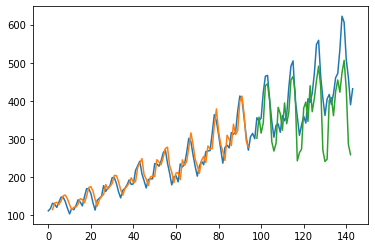

Epoch 1/6
93/93 - 2s - loss: 0.0072
Epoch 2/6
93/93 - 0s - loss: 0.0253
Epoch 3/6
93/93 - 0s - loss: 0.0157
Epoch 4/6
93/93 - 0s - loss: 0.0123
Epoch 5/6
93/93 - 0s - loss: 0.0103
Epoch 6/6
93/93 - 0s - loss: 0.0091
Epoch 1/6
93/93 - 0s - loss: 0.0049
Epoch 2/6
93/93 - 0s - loss: 0.0079
Epoch 3/6
93/93 - 0s - loss: 0.0077
Epoch 4/6
93/93 - 0s - loss: 0.0074
Epoch 5/6
93/93 - 0s - loss: 0.0072
Epoch 6/6
93/93 - 0s - loss: 0.0069
Epoch 1/6
93/93 - 0s - loss: 0.0042
Epoch 2/6
93/93 - 0s - loss: 0.0066
Epoch 3/6
93/93 - 0s - loss: 0.0064
Epoch 4/6
93/93 - 0s - loss: 0.0062
Epoch 5/6
93/93 - 0s - loss: 0.0061
Epoch 6/6
93/93 - 0s - loss: 0.0059
Epoch 1/6
93/93 - 0s - loss: 0.0039
Epoch 2/6
93/93 - 0s - loss: 0.0057
Epoch 3/6
93/93 - 0s - loss: 0.0055
Epoch 4/6
93/93 - 0s - loss: 0.0054
Epoch 5/6
93/93 - 0s - loss: 0.0053
Epoch 6/6
93/93 - 0s - loss: 0.0051
Epoch 1/6
93/93 - 0s - loss: 0.0038
Epoch 2/6
93/93 - 0s - loss: 0.0050
Epoch 3/6
93/93 - 0s - loss: 0.0049
Epoch 4/6
93/93 - 0s - loss:

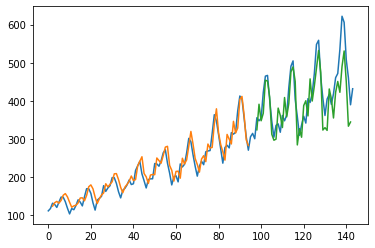

Epoch 1/6
93/93 - 2s - loss: 0.0046
Epoch 2/6
93/93 - 0s - loss: 0.0133
Epoch 3/6
93/93 - 0s - loss: 0.0084
Epoch 4/6
93/93 - 0s - loss: 0.0070
Epoch 5/6
93/93 - 0s - loss: 0.0064
Epoch 6/6
93/93 - 0s - loss: 0.0061
Epoch 1/6
93/93 - 0s - loss: 0.0040
Epoch 2/6
93/93 - 0s - loss: 0.0059
Epoch 3/6
93/93 - 0s - loss: 0.0057
Epoch 4/6
93/93 - 0s - loss: 0.0056
Epoch 5/6
93/93 - 0s - loss: 0.0054
Epoch 6/6
93/93 - 0s - loss: 0.0053
Epoch 1/6
93/93 - 0s - loss: 0.0038
Epoch 2/6
93/93 - 0s - loss: 0.0051
Epoch 3/6
93/93 - 0s - loss: 0.0050
Epoch 4/6
93/93 - 0s - loss: 0.0049
Epoch 5/6
93/93 - 0s - loss: 0.0048
Epoch 6/6
93/93 - 0s - loss: 0.0047
Epoch 1/6
93/93 - 0s - loss: 0.0036
Epoch 2/6
93/93 - 0s - loss: 0.0046
Epoch 3/6
93/93 - 0s - loss: 0.0045
Epoch 4/6
93/93 - 0s - loss: 0.0044
Epoch 5/6
93/93 - 0s - loss: 0.0043
Epoch 6/6
93/93 - 0s - loss: 0.0042
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0041
Epoch 3/6
93/93 - 0s - loss: 0.0040
Epoch 4/6
93/93 - 0s - loss:

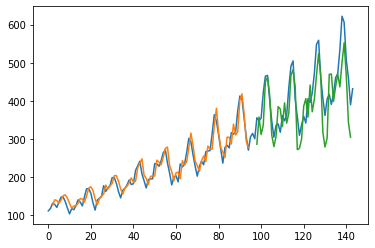

Epoch 1/6
93/93 - 2s - loss: 0.0064
Epoch 2/6
93/93 - 0s - loss: 0.0116
Epoch 3/6
93/93 - 0s - loss: 0.0085
Epoch 4/6
93/93 - 0s - loss: 0.0071
Epoch 5/6
93/93 - 0s - loss: 0.0063
Epoch 6/6
93/93 - 0s - loss: 0.0058
Epoch 1/6
93/93 - 0s - loss: 0.0045
Epoch 2/6
93/93 - 0s - loss: 0.0053
Epoch 3/6
93/93 - 0s - loss: 0.0051
Epoch 4/6
93/93 - 0s - loss: 0.0050
Epoch 5/6
93/93 - 0s - loss: 0.0049
Epoch 6/6
93/93 - 0s - loss: 0.0048
Epoch 1/6
93/93 - 0s - loss: 0.0040
Epoch 2/6
93/93 - 0s - loss: 0.0046
Epoch 3/6
93/93 - 0s - loss: 0.0045
Epoch 4/6
93/93 - 0s - loss: 0.0045
Epoch 5/6
93/93 - 0s - loss: 0.0044
Epoch 6/6
93/93 - 0s - loss: 0.0043
Epoch 1/6
93/93 - 0s - loss: 0.0037
Epoch 2/6
93/93 - 0s - loss: 0.0042
Epoch 3/6
93/93 - 0s - loss: 0.0041
Epoch 4/6
93/93 - 0s - loss: 0.0041
Epoch 5/6
93/93 - 0s - loss: 0.0040
Epoch 6/6
93/93 - 0s - loss: 0.0039
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0038
Epoch 3/6
93/93 - 0s - loss: 0.0038
Epoch 4/6
93/93 - 0s - loss:

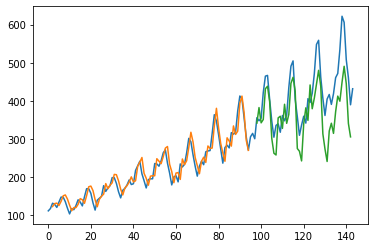

Epoch 1/6
93/93 - 2s - loss: 0.0041
Epoch 2/6
93/93 - 0s - loss: 0.0072
Epoch 3/6
93/93 - 0s - loss: 0.0066
Epoch 4/6
93/93 - 0s - loss: 0.0063
Epoch 5/6
93/93 - 0s - loss: 0.0060
Epoch 6/6
93/93 - 0s - loss: 0.0058
Epoch 1/6
93/93 - 0s - loss: 0.0038
Epoch 2/6
93/93 - 0s - loss: 0.0055
Epoch 3/6
93/93 - 0s - loss: 0.0053
Epoch 4/6
93/93 - 0s - loss: 0.0052
Epoch 5/6
93/93 - 0s - loss: 0.0050
Epoch 6/6
93/93 - 0s - loss: 0.0049
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0046
Epoch 3/6
93/93 - 0s - loss: 0.0045
Epoch 4/6
93/93 - 0s - loss: 0.0044
Epoch 5/6
93/93 - 0s - loss: 0.0043
Epoch 6/6
93/93 - 0s - loss: 0.0042
Epoch 1/6
93/93 - 0s - loss: 0.0033
Epoch 2/6
93/93 - 0s - loss: 0.0040
Epoch 3/6
93/93 - 0s - loss: 0.0040
Epoch 4/6
93/93 - 0s - loss: 0.0039
Epoch 5/6
93/93 - 0s - loss: 0.0038
Epoch 6/6
93/93 - 0s - loss: 0.0037
Epoch 1/6
93/93 - 0s - loss: 0.0031
Epoch 2/6
93/93 - 0s - loss: 0.0036
Epoch 3/6
93/93 - 0s - loss: 0.0035
Epoch 4/6
93/93 - 0s - loss:

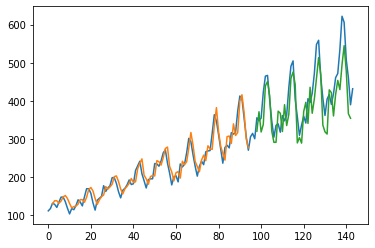

Epoch 1/6
93/93 - 2s - loss: 0.0039
Epoch 2/6
93/93 - 0s - loss: 0.0094
Epoch 3/6
93/93 - 0s - loss: 0.0068
Epoch 4/6
93/93 - 0s - loss: 0.0056
Epoch 5/6
93/93 - 0s - loss: 0.0050
Epoch 6/6
93/93 - 0s - loss: 0.0047
Epoch 1/6
93/93 - 0s - loss: 0.0038
Epoch 2/6
93/93 - 0s - loss: 0.0044
Epoch 3/6
93/93 - 0s - loss: 0.0043
Epoch 4/6
93/93 - 0s - loss: 0.0042
Epoch 5/6
93/93 - 0s - loss: 0.0041
Epoch 6/6
93/93 - 0s - loss: 0.0041
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0039
Epoch 3/6
93/93 - 0s - loss: 0.0039
Epoch 4/6
93/93 - 0s - loss: 0.0038
Epoch 5/6
93/93 - 0s - loss: 0.0037
Epoch 6/6
93/93 - 0s - loss: 0.0037
Epoch 1/6
93/93 - 0s - loss: 0.0033
Epoch 2/6
93/93 - 0s - loss: 0.0036
Epoch 3/6
93/93 - 0s - loss: 0.0035
Epoch 4/6
93/93 - 0s - loss: 0.0034
Epoch 5/6
93/93 - 0s - loss: 0.0034
Epoch 6/6
93/93 - 0s - loss: 0.0033
Epoch 1/6
93/93 - 0s - loss: 0.0031
Epoch 2/6
93/93 - 0s - loss: 0.0032
Epoch 3/6
93/93 - 0s - loss: 0.0031
Epoch 4/6
93/93 - 0s - loss:

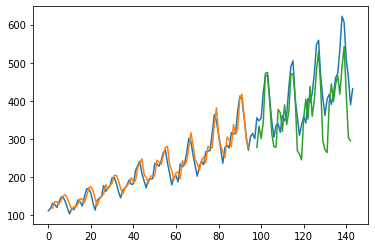

Epoch 1/6
93/93 - 2s - loss: 0.0147
Epoch 2/6
93/93 - 0s - loss: 0.0625
Epoch 3/6
93/93 - 0s - loss: 0.0276
Epoch 4/6
93/93 - 0s - loss: 0.0206
Epoch 5/6
93/93 - 0s - loss: 0.0163
Epoch 6/6
93/93 - 0s - loss: 0.0133
Epoch 1/6
93/93 - 0s - loss: 0.0089
Epoch 2/6
93/93 - 0s - loss: 0.0097
Epoch 3/6
93/93 - 0s - loss: 0.0087
Epoch 4/6
93/93 - 0s - loss: 0.0080
Epoch 5/6
93/93 - 0s - loss: 0.0075
Epoch 6/6
93/93 - 0s - loss: 0.0071
Epoch 1/6
93/93 - 0s - loss: 0.0047
Epoch 2/6
93/93 - 0s - loss: 0.0066
Epoch 3/6
93/93 - 0s - loss: 0.0064
Epoch 4/6
93/93 - 0s - loss: 0.0062
Epoch 5/6
93/93 - 0s - loss: 0.0060
Epoch 6/6
93/93 - 0s - loss: 0.0059
Epoch 1/6
93/93 - 0s - loss: 0.0043
Epoch 2/6
93/93 - 0s - loss: 0.0056
Epoch 3/6
93/93 - 0s - loss: 0.0055
Epoch 4/6
93/93 - 0s - loss: 0.0054
Epoch 5/6
93/93 - 0s - loss: 0.0052
Epoch 6/6
93/93 - 0s - loss: 0.0051
Epoch 1/6
93/93 - 0s - loss: 0.0040
Epoch 2/6
93/93 - 0s - loss: 0.0049
Epoch 3/6
93/93 - 0s - loss: 0.0048
Epoch 4/6
93/93 - 0s - loss:

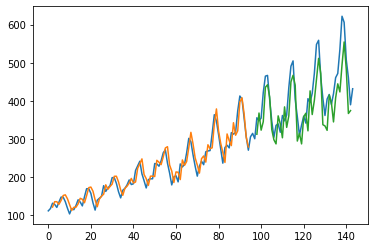

Epoch 1/6
93/93 - 2s - loss: 0.0041
Epoch 2/6
93/93 - 0s - loss: 0.0092
Epoch 3/6
93/93 - 0s - loss: 0.0076
Epoch 4/6
93/93 - 0s - loss: 0.0067
Epoch 5/6
93/93 - 0s - loss: 0.0061
Epoch 6/6
93/93 - 0s - loss: 0.0058
Epoch 1/6
93/93 - 0s - loss: 0.0042
Epoch 2/6
93/93 - 0s - loss: 0.0054
Epoch 3/6
93/93 - 0s - loss: 0.0052
Epoch 4/6
93/93 - 0s - loss: 0.0051
Epoch 5/6
93/93 - 0s - loss: 0.0050
Epoch 6/6
93/93 - 0s - loss: 0.0048
Epoch 1/6
93/93 - 0s - loss: 0.0038
Epoch 2/6
93/93 - 0s - loss: 0.0046
Epoch 3/6
93/93 - 0s - loss: 0.0046
Epoch 4/6
93/93 - 0s - loss: 0.0045
Epoch 5/6
93/93 - 0s - loss: 0.0044
Epoch 6/6
93/93 - 0s - loss: 0.0043
Epoch 1/6
93/93 - 0s - loss: 0.0036
Epoch 2/6
93/93 - 0s - loss: 0.0042
Epoch 3/6
93/93 - 0s - loss: 0.0041
Epoch 4/6
93/93 - 0s - loss: 0.0040
Epoch 5/6
93/93 - 0s - loss: 0.0040
Epoch 6/6
93/93 - 0s - loss: 0.0039
Epoch 1/6
93/93 - 0s - loss: 0.0035
Epoch 2/6
93/93 - 0s - loss: 0.0038
Epoch 3/6
93/93 - 0s - loss: 0.0037
Epoch 4/6
93/93 - 0s - loss:

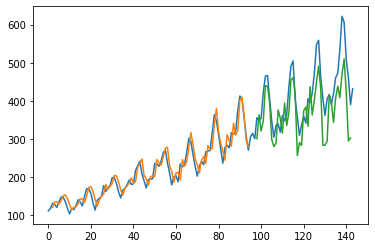

models  ... test_score_RMSE
0   <keras.engine.sequential.Sequential object at ...  ...       57.847147
1   <keras.engine.sequential.Sequential object at ...  ...       63.537697
2   <keras.engine.sequential.Sequential object at ...  ...       74.377136
3   <keras.engine.sequential.Sequential object at ...  ...       47.524074
4   <keras.engine.sequential.Sequential object at ...  ...       80.118731
..                                                ...  ...             ...
95  <keras.engine.sequential.Sequential object at ...  ...       73.858712
96  <keras.engine.sequential.Sequential object at ...  ...       53.134927
97  <keras.engine.sequential.Sequential object at ...  ...       66.272842
98  <keras.engine.sequential.Sequential object at ...  ...       53.012020
99  <keras.engine.sequential.Sequential object at ...  ...       68.648435

[100 rows x 8 columns]

In [117]:
for i in range(10):
  res_dict = get_results(scaler=MinMaxScaler(feature_range=(0, 1)),
                         look_back=2,
                         batch_size=1,
                         epochs=6,
                         res_dict=res_dict)
pd.DataFrame(res_dict)

In [118]:
res_df = pd.DataFrame(res_dict)
res_df.iloc[90:].describe()

look_backs  batch_sizes  epochs  train_score_RMSE  test_score_RMSE
count        10.0         10.0    10.0         10.000000        10.000000
mean          2.0          1.0     6.0         20.142327        63.055197
std           0.0          0.0     0.0          0.296760         8.917211
min           2.0          1.0     6.0         19.818625        52.261177
25%           2.0          1.0     6.0         19.891679        54.387471
50%           2.0          1.0     6.0         20.081991        62.675718
75%           2.0          1.0     6.0         20.316125        71.436943
max           2.0          1.0     6.0         20.687765        73.858712

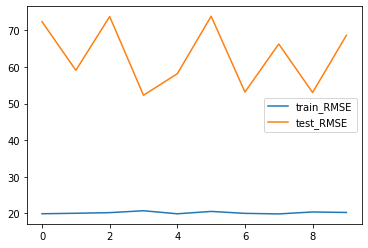

In [119]:
plt.plot(res_dict['train_score_RMSE'][90:], label='train_RMSE')
plt.plot(res_dict['test_score_RMSE'][90:], label='test_RMSE')
plt.legend()
plt.show()